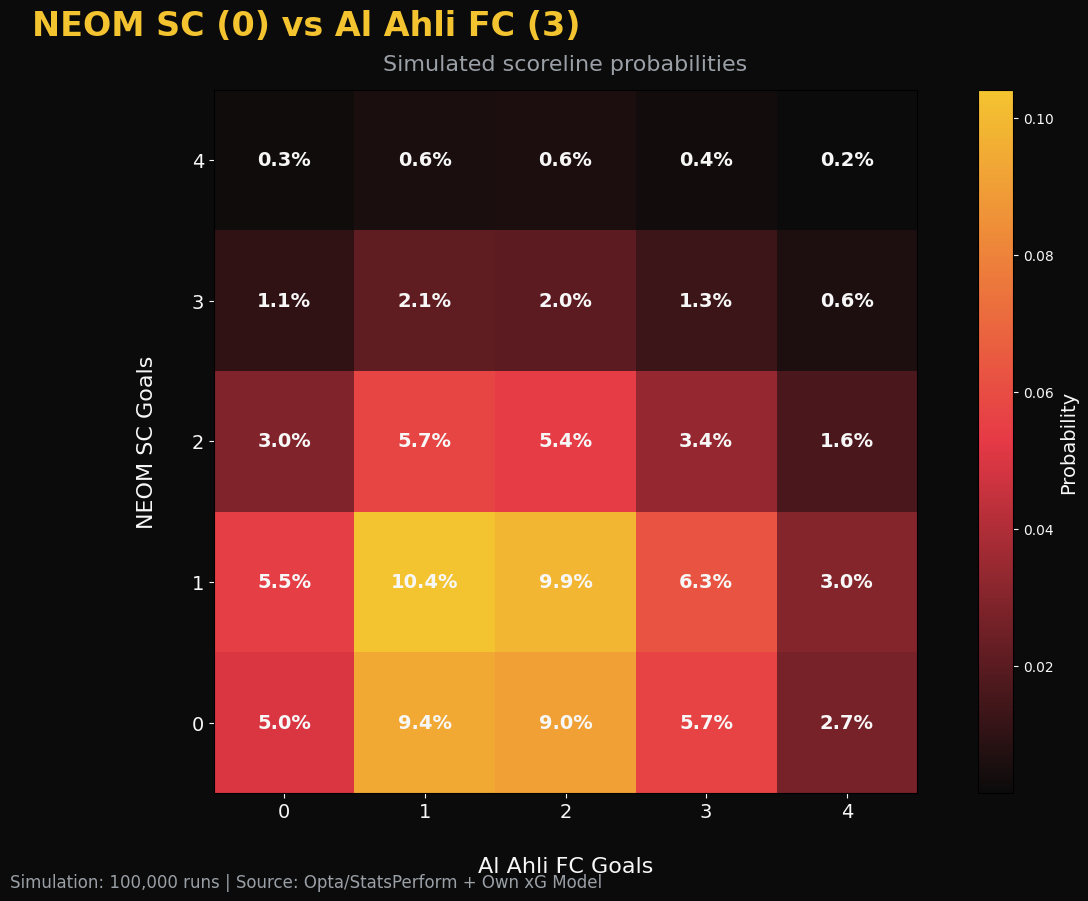

Saved PNG → /Users/user/Downloads/Post-Match NEOM/Page 7.png


In [7]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# --- COLOR PALETTE ---
OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "emerald": "#2ECC71",
    "crimson": "#E63946",
    "blue":    "#4D96FF",
    "violet":  "#7B61FF",
}

# Custom heatmap colormap (brand-safe)
outswinger_cmap = LinearSegmentedColormap.from_list(
    "outswinger",
    [OUTSWINGER["black"], OUTSWINGER["crimson"], OUTSWINGER["yellow"]]
)

# --- SETTINGS ---
csv_path = "/Users/user/XG/Saudi/xgCSV/2026-01-24_NEOM SC - Al Ahli FC.csv"

home_team = "NEOM SC"
away_team = "Al Ahli FC"

png_path = "/Users/user/Downloads/Post-Match NEOM/Page 7.png"

# --- LOAD DATA ---
df = pd.read_csv(csv_path)

xg_home = df[df["TeamId"] == home_team]["xG"].sum()
xg_away = df[df["TeamId"] == away_team]["xG"].sum()

goals_home = df[(df["TeamId"] == home_team) & (df["isGoal"] == 1)].shape[0]
goals_away = df[(df["TeamId"] == away_team) & (df["isGoal"] == 1)].shape[0]

# --- SIMULATE ---
n_sims = 100_000
home_goals = np.random.poisson(xg_home, n_sims)
away_goals = np.random.poisson(xg_away, n_sims)

scorelines = Counter(zip(home_goals, away_goals))

# --- 5x5 MATRIX ---
max_goals = 5
matrix = np.zeros((max_goals, max_goals))

for (h, a), freq in scorelines.items():
    if h < max_goals and a < max_goals:
        matrix[h, a] = freq / n_sims

# --- PLOT (TRUE 16:9) ---
fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor(OUTSWINGER["black"])
ax.set_facecolor(OUTSWINGER["black"])

im = ax.imshow(matrix, cmap=outswinger_cmap, origin="lower")

# Cell annotations
for i in range(max_goals):
    for j in range(max_goals):
        pct = matrix[i, j] * 100
        ax.text(
            j, i, f"{pct:.1f}%",
            ha="center", va="center",
            color=OUTSWINGER["white"],
            fontsize=14, fontweight="bold"
        )

# --- TITLES ---
fig.suptitle(
    f"{home_team} ({goals_home}) vs {away_team} ({goals_away})",
    fontsize=24, fontweight="bold",
    color=OUTSWINGER["yellow"], y=0.98
)

ax.set_title(
    "Simulated scoreline probabilities",
    fontsize=16, color=OUTSWINGER["grey"], pad=14
)

# --- AXES ---
ax.set_xlabel(f"{away_team} Goals", fontsize=16, labelpad=25, color=OUTSWINGER["white"])
ax.set_ylabel(f"{home_team} Goals", fontsize=16, labelpad=25, color=OUTSWINGER["white"])

ax.set_xticks(range(max_goals))
ax.set_yticks(range(max_goals))
ax.tick_params(colors=OUTSWINGER["white"], labelsize=14)

# --- COLORBAR ---
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_tick_params(color=OUTSWINGER["white"])
plt.setp(cbar.ax.get_yticklabels(), color=OUTSWINGER["white"])
cbar.set_label("Probability", color=OUTSWINGER["white"], fontsize=14)

# --- FOOTER ---
plt.figtext(
    0.5, 0.005,
    f"Simulation: {n_sims:,} runs | Source: Opta/StatsPerform + Own xG Model",
    ha="center", fontsize=12, color=OUTSWINGER["grey"]
)

plt.tight_layout()

# --- SAVE PNG ---
plt.savefig(
    png_path,
    dpi=300,
    facecolor=fig.get_facecolor(),
    bbox_inches="tight"
)

plt.show()

print(f"Saved PNG → {os.path.abspath(png_path)}")


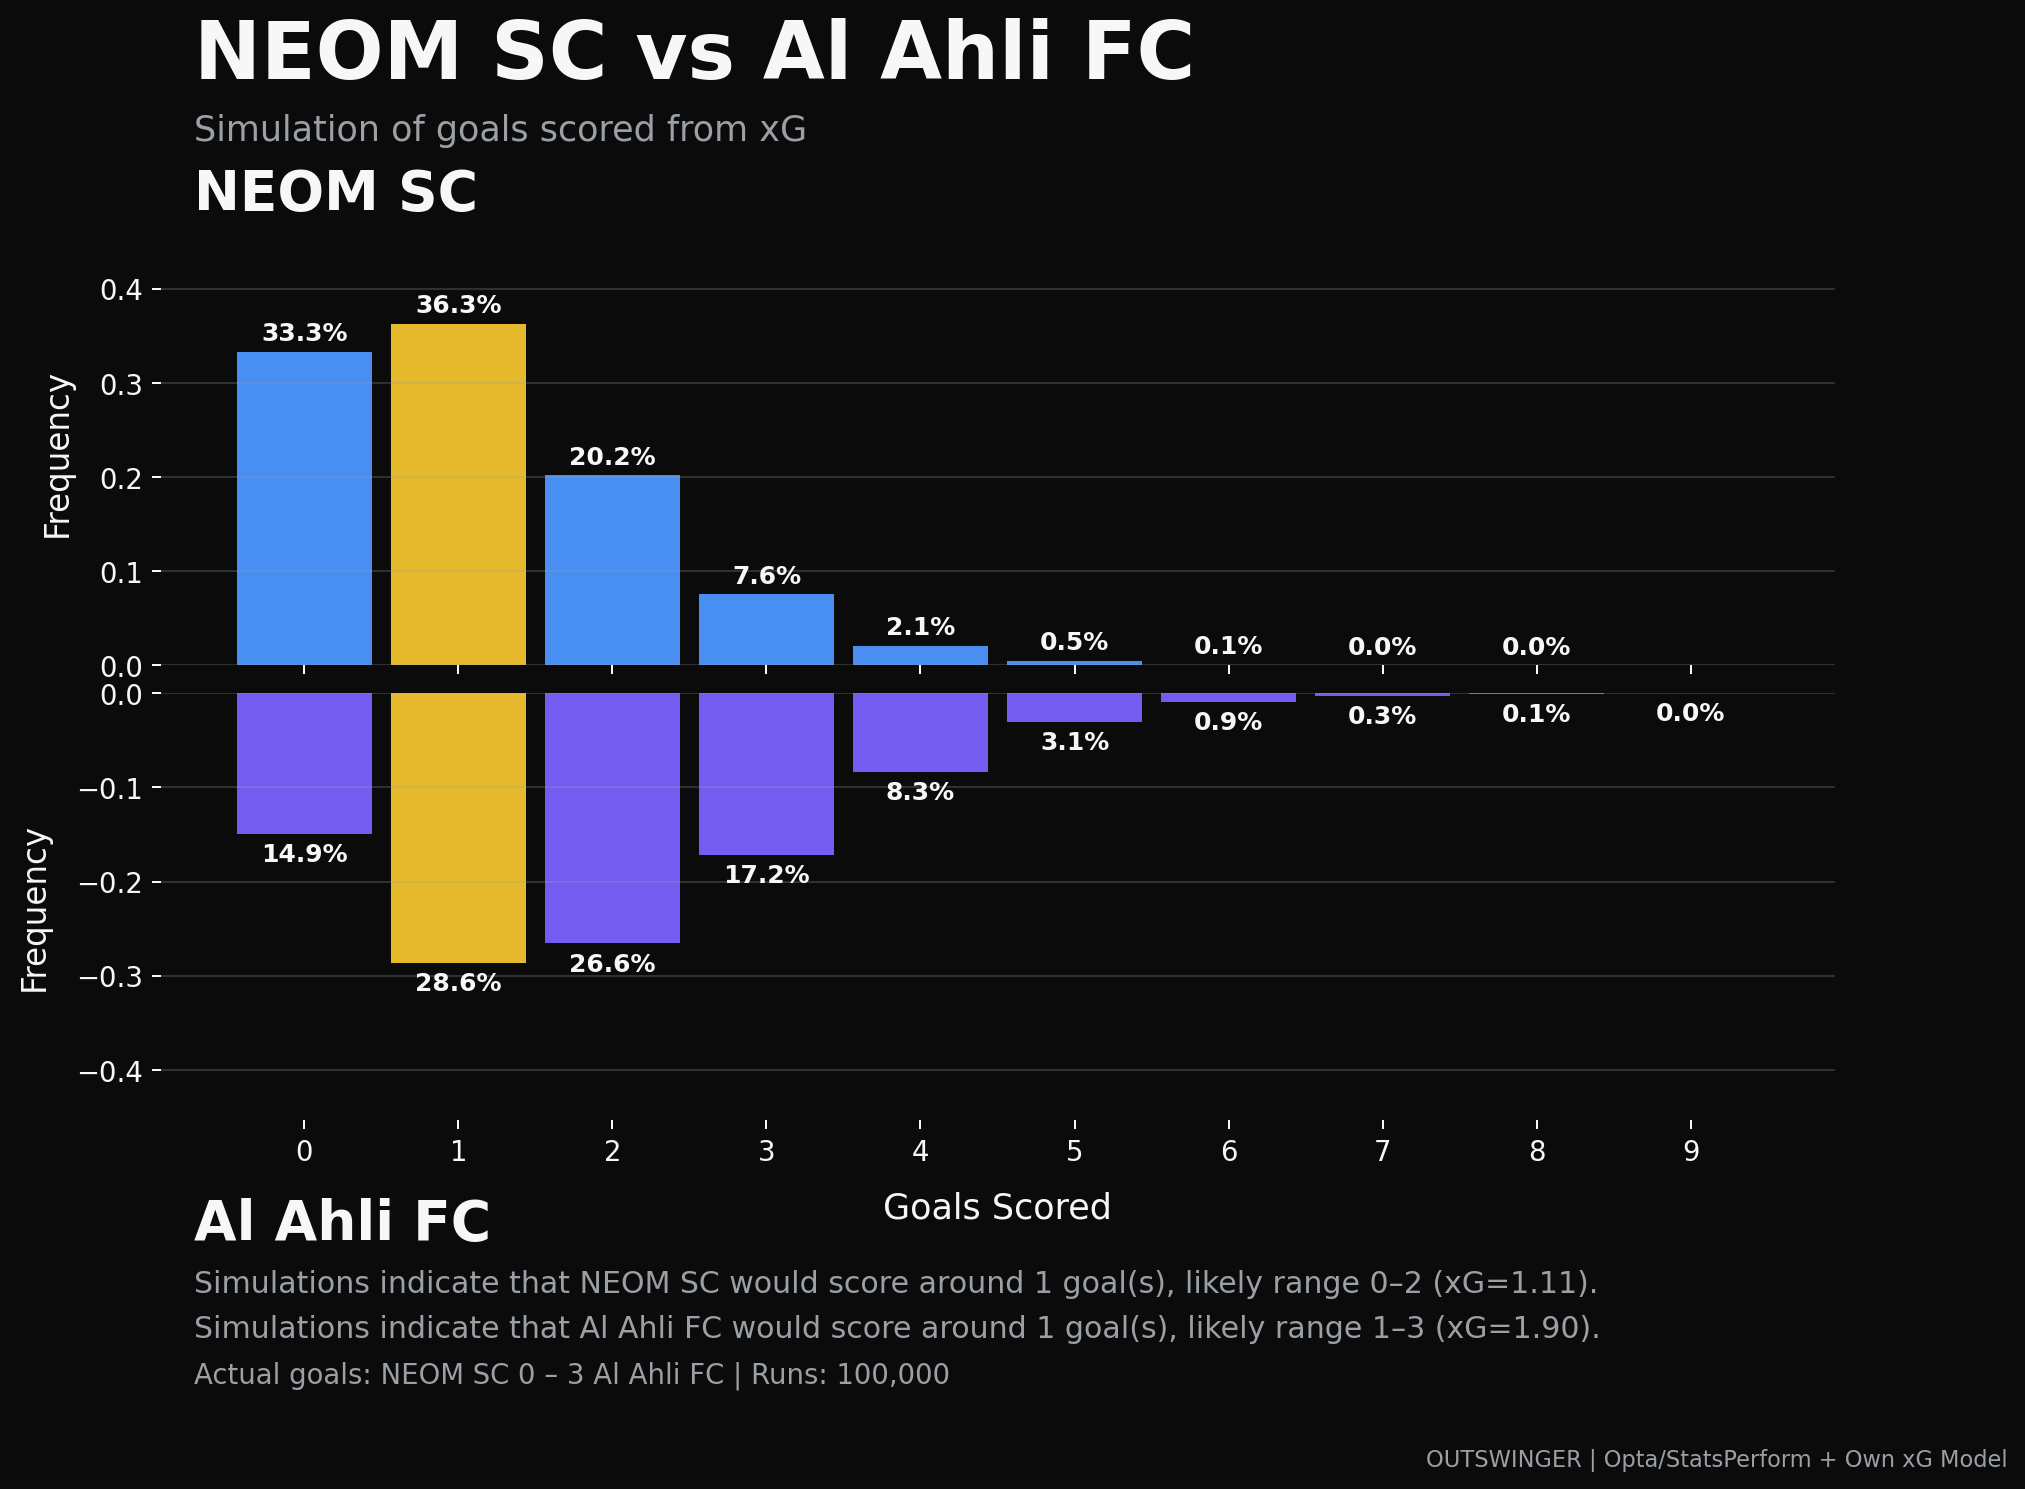

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# --- COLOR PALETTE ---
OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "emerald": "#2ECC71",
    "crimson": "#E63946",
    "blue":    "#4D96FF",
    "violet":  "#7B61FF",
}

# --- SETTINGS ---
logo_dir = "/Users/user/logo"   # folder where team logos are stored
csv_path = "/Users/user/XG/Saudi/xgCSV/2026-01-24_NEOM SC - Al Ahli FC.csv"

home_team = "NEOM SC" 
away_team = "Al Ahli FC"

n_sims = 100_000
max_goals = 9  # show 0..9

# --- LOAD DATA ---
df = pd.read_csv(csv_path)

# xG totals
xg_home = df[df["TeamId"] == home_team]["xG"].sum()
xg_away = df[df["TeamId"] == away_team]["xG"].sum()

# actual goals
goals_home = df[(df["TeamId"] == home_team) & (df["isGoal"] == 1)].shape[0]
goals_away = df[(df["TeamId"] == away_team) & (df["isGoal"] == 1)].shape[0]

# --- FIND LOGOS ---
def find_logo(team_name, folder):
    """Try to find a PNG logo matching the team name in the given folder."""
    team_clean = team_name.lower().replace(" ", "").replace("-", "")
    if not os.path.isdir(folder):
        return None
    for file in os.listdir(folder):
        if file.lower().endswith(".png"):
            fname_clean = file.lower().replace(" ", "").replace("-", "").replace(".png", "")
            if team_clean in fname_clean:
                return os.path.join(folder, file)
    return None

home_logo_path = find_logo(home_team, logo_dir)
away_logo_path = find_logo(away_team, logo_dir)

# --- SIMULATE GOALS FROM xG ---
home_draws = np.random.poisson(xg_home, n_sims)
away_draws = np.random.poisson(xg_away, n_sims)

# goal distribution 0..max_goals
bins = np.arange(0, max_goals + 1)
home_counts = np.array([(home_draws == g).sum() for g in bins], dtype=float)
away_counts = np.array([(away_draws == g).sum() for g in bins], dtype=float)

home_freq = home_counts / n_sims
away_freq = away_counts / n_sims

home_mode = int(bins[np.argmax(home_freq)])
away_mode = int(bins[np.argmax(away_freq)])

# likely range (central 68%)
h_lo, h_hi = np.quantile(home_draws, [0.16, 0.84])
a_lo, a_hi = np.quantile(away_draws, [0.16, 0.84])
h_lo, h_hi = int(np.floor(h_lo)), int(np.ceil(h_hi))
a_lo, a_hi = int(np.floor(a_lo)), int(np.ceil(a_hi))

# --- PLOT STYLE (OUTSWINGER) ---
bg = OUTSWINGER["black"]
fg = OUTSWINGER["white"]
muted = OUTSWINGER["grey"]

home_bar = OUTSWINGER["blue"]
away_bar = OUTSWINGER["violet"]
highlight = OUTSWINGER["yellow"]

# --- FIGURE LAYOUT ---
fig = plt.figure(figsize=(12, 9), dpi=180)
fig.patch.set_facecolor(bg)

gs = fig.add_gridspec(
    nrows=7, ncols=1,
    # title row taller + notes row slightly taller
    height_ratios=[1.2, 3.1, 0.2, 3.1, 0.25, 1.1, 0.1],
    hspace=0.0
)

ax_title = fig.add_subplot(gs[0, 0])
ax_top   = fig.add_subplot(gs[1, 0])
ax_midsp = fig.add_subplot(gs[2, 0])
ax_bot   = fig.add_subplot(gs[3, 0], sharex=ax_top)
ax_sp2   = fig.add_subplot(gs[4, 0])
ax_note  = fig.add_subplot(gs[5, 0])

for ax in [ax_title, ax_midsp, ax_sp2, ax_note]:
    ax.set_facecolor(bg)
    ax.axis("off")

for ax in [ax_top, ax_bot]:
    ax.set_facecolor(bg)
    ax.grid(True, axis="y", color=OUTSWINGER["grey"], alpha=0.25, linewidth=0.8)
    ax.tick_params(colors=fg, labelsize=11)
    for spine in ax.spines.values():
        spine.set_visible(False)

# --- TITLE AREA (HIGHER) ---
ax_title.text(
    0.02, 1.1,
    f"{home_team} vs {away_team}",
    color=fg, fontsize=32, fontweight="bold", ha="left", va="center"
)
ax_title.text(
    0.02, 0.65,
    "Simulation of goals scored from xG",
    color=muted, fontsize=14, ha="left", va="center"
)

# --- TOP (HOME) ---
x = bins
home_colors = [highlight if g == home_mode else home_bar for g in x]
ax_top.bar(x, home_freq, color=home_colors, alpha=0.95, width=0.88)
ax_top.set_ylabel("Frequency", color=fg, fontsize=13, labelpad=10)
ax_top.set_ylim(0, max(home_freq.max(), away_freq.max()) * 1.25)

# percent labels
for g, f in zip(x, home_freq):
    if f <= 0:
        continue
    ax_top.text(
        g, f + ax_top.get_ylim()[1] * 0.015,
        f"{f*100:.1f}%",
        ha="center", va="bottom",
        color=fg, fontsize=10, fontweight="bold"
    )

# HOME label
ax_top.text(
    0.02, 1.04,
    home_team,
    transform=ax_top.transAxes,
    color=fg, fontsize=22, fontweight="bold", ha="left", va="bottom"
)

# --- BOTTOM (AWAY) inverted ---
away_colors = [highlight if g == away_mode else away_bar for g in x]
ax_bot.bar(x, -away_freq, color=away_colors, alpha=0.95, width=0.88)
ax_bot.set_ylabel("Frequency", color=fg, fontsize=13, labelpad=10)

top_lim = ax_top.get_ylim()[1]
ax_bot.set_ylim(-top_lim, 0)

# percent labels
for g, f in zip(x, away_freq):
    if f <= 0:
        continue
    ax_bot.text(
        g, -f - top_lim * 0.02,
        f"{f*100:.1f}%",
        ha="center", va="top",
        color=fg, fontsize=10, fontweight="bold"
    )

# AWAY label
ax_bot.text(
    0.02, -0.18,
    away_team,
    transform=ax_bot.transAxes,
    color=fg, fontsize=22, fontweight="bold", ha="left", va="top"
)

# --- SHARED X AXIS ---
ax_bot.set_xlabel("Goals Scored", color=fg, fontsize=14, labelpad=10)
ax_bot.set_xticks(x)
ax_bot.set_xticklabels([str(i) for i in x], color=fg, fontsize=11)
plt.setp(ax_top.get_xticklabels(), visible=False)



# --- NOTES / SUMMARY (LOWER) ---
summary_lines = [
    f"Simulations indicate that {home_team} would score around {home_mode} goal(s), "
    f"likely range {h_lo}–{h_hi} (xG={xg_home:.2f}).",
    f"Simulations indicate that {away_team} would score around {away_mode} goal(s), "
    f"likely range {a_lo}–{a_hi} (xG={xg_away:.2f}).",
    f"Actual goals: {home_team} {goals_home} – {goals_away} {away_team} | Runs: {n_sims:,}"
]

ax_note.text(0.02, 0.15, summary_lines[0], color=muted, fontsize=12, ha="left", va="center")
ax_note.text(0.02, -0.15, summary_lines[1], color=muted, fontsize=12, ha="left", va="center")
ax_note.text(0.02, -0.45, summary_lines[2], color=muted, fontsize=11, ha="left", va="center")

# footer
fig.text(
    0.98, 0.02,
    "OUTSWINGER | Opta/StatsPerform + Own xG Model",
    color=muted, fontsize=9, ha="right"
)
out_path = "/Users/user/Downloads/Post-Match NEOM/Page 8.png"  # or give a full path like "/Users/user/Desktop/Page 8.png"

plt.savefig(
    out_path,
    dpi=180,
    facecolor=fig.get_facecolor(),
    bbox_inches="tight",
    pad_inches=0.2
)
plt.show()


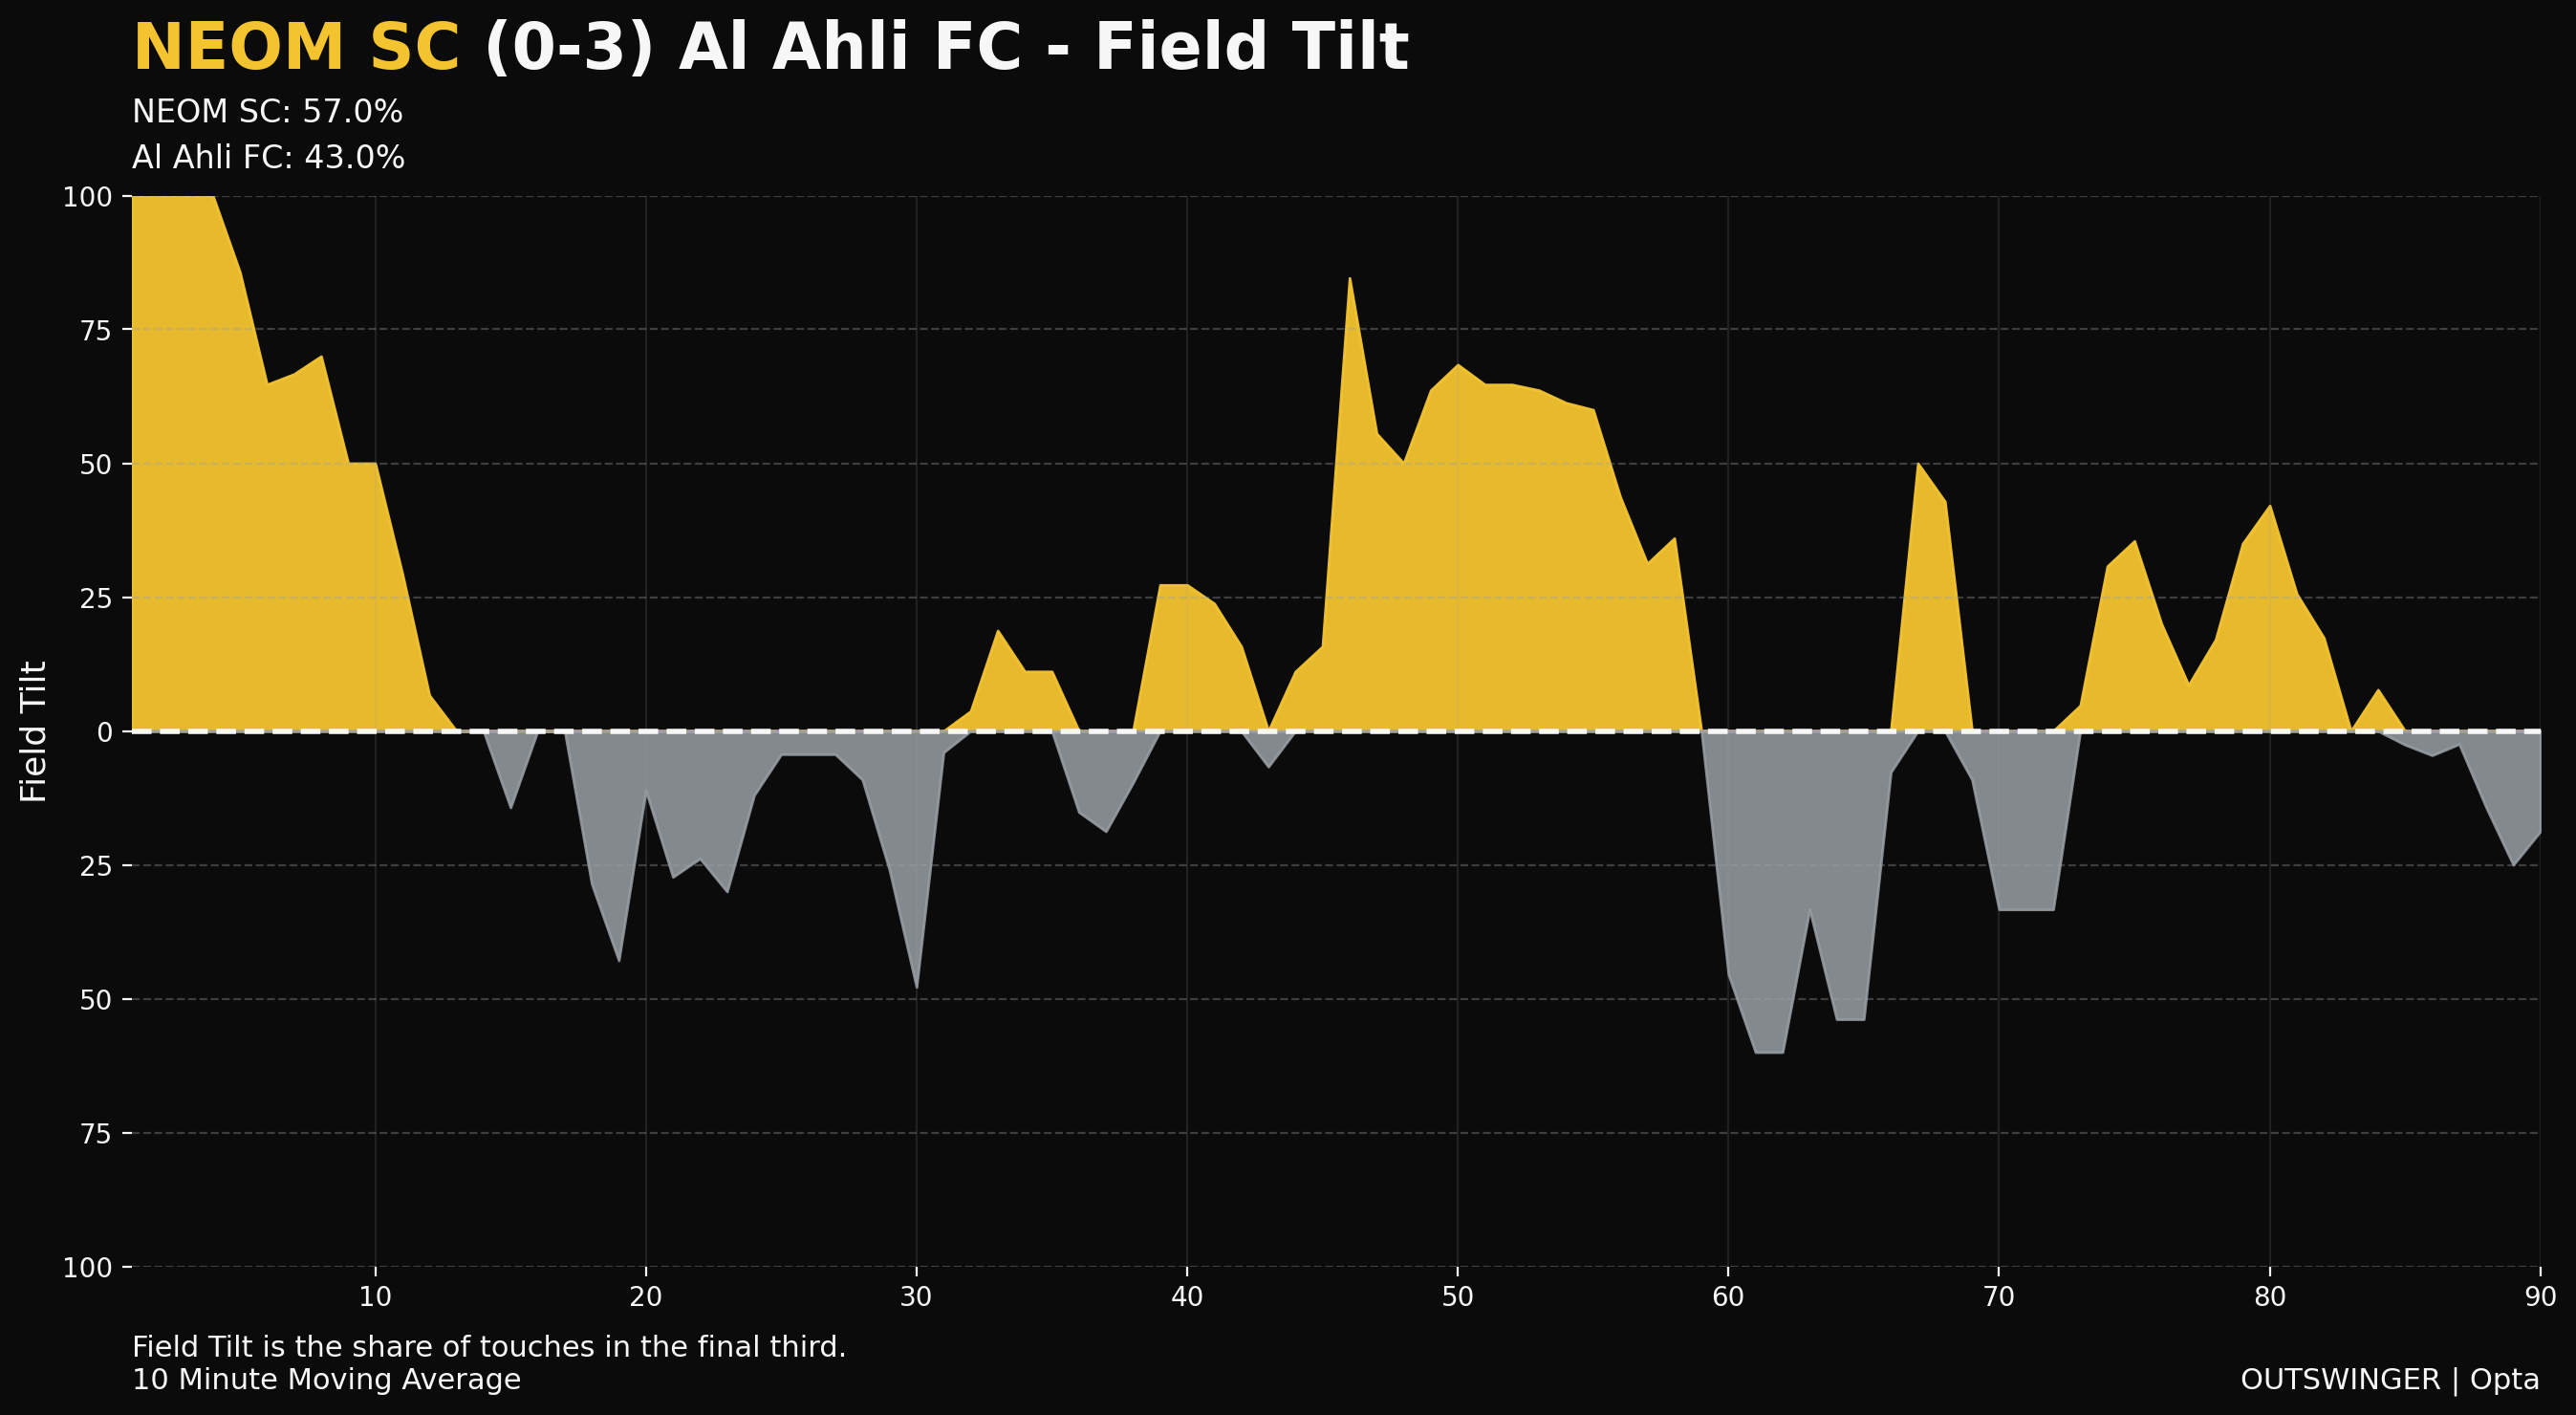

Saved PNG to: /Users/user/Downloads/Post-Match NEOM/Page 9.png


In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- OUTSWINGER COLOR PALETTE ---
OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "emerald": "#2ECC71",
    "crimson": "#E63946",
    "blue":    "#4D96FF",
    "violet":  "#7B61FF",
}

# ----------------------------
# SETTINGS
# ----------------------------
json_path = "/Users/user/XG/Saudi/DONE/2026-01-24_NEOM SC - Al Ahli FC.json"

home_team = "NEOM SC"
away_team = "Al Ahli FC"
score_txt = "(0-3)"

ROLL_MINUTES = 10
FINAL_THIRD_X = 66.7

YELLOW_TEAM = "NEOM SC"

out_png = "/Users/user/Downloads/Post-Match NEOM/Page 9.png"
dpi = 200

# ----------------------------
# HELPERS
# ----------------------------
def find_events(obj):
    if isinstance(obj, dict):
        for k, v in obj.items():
            if k == "event" and isinstance(v, list):
                return v
            for vv in obj.values():
                res = find_events(vv)
                if res is not None:
                    return res
    elif isinstance(obj, list):
        for it in obj:
            res = find_events(it)
            if res is not None:
                return res
    return None

def dig(d, keys):
    if not isinstance(d, dict):
        return None
    for k in keys:
        if k in d:
            return d[k]
    for pk in ["contestant", "team"]:
        if pk in d and isinstance(d[pk], dict) and "id" in d[pk]:
            return d[pk]["id"]
    return None

def to_float(x):
    try:
        return float(x)
    except Exception:
        return np.nan

def to_int(x):
    try:
        return int(float(x))
    except Exception:
        return np.nan

def draw_colored_title(fig, x, y, home, score, away, yellow_team):
    """
    Draws: Home (score) Away - Field Tilt
    Colors yellow_team in yellow, others white.
    """
    renderer = fig.canvas.get_renderer()
    fig_w_px = fig.get_size_inches()[0] * fig.dpi

    def draw(text, color):
        nonlocal x
        t = fig.text(x, y, text, fontsize=24, fontweight="bold",
                     color=color, ha="left", va="center")
        fig.canvas.draw()
        bb = t.get_window_extent(renderer=renderer)
        x += bb.width / fig_w_px

    draw(home, OUTSWINGER["yellow"] if home == yellow_team else OUTSWINGER["white"])
    draw(f" {score} ", OUTSWINGER["white"])
    draw(away, OUTSWINGER["yellow"] if away == yellow_team else OUTSWINGER["white"])
    draw(" - Field Tilt", OUTSWINGER["white"])

# ----------------------------
# LOAD JSON
# ----------------------------
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

events = find_events(data)
rows = []

for ev in events:
    rows.append({
        "contestantId": dig(ev, ["contestantId", "teamId"]),
        "periodId": dig(ev, ["periodId", "period"]),
        "timeMin": dig(ev, ["timeMin", "minute"]),
        "x": dig(ev, ["x", "posX"]),
    })

df = pd.DataFrame(rows)
df["contestantId"] = df["contestantId"].astype(str)
df["periodId"] = df["periodId"].apply(to_int)
df["timeMin"] = df["timeMin"].apply(to_int)
df["x"] = df["x"].apply(to_float)

df = df[df["periodId"].isin([1, 2])]

teams = df["contestantId"].dropna().unique()
HOME_ID, AWAY_ID = teams[0], teams[1]

# ----------------------------
# FINAL THIRD TOUCHES (NEOM = positive)
# ----------------------------
touches = df[df["x"].notna()].copy()
touches["in_final_third"] = touches["x"] >= FINAL_THIRD_X

minutes = np.arange(1, 91)

if away_team == YELLOW_TEAM:
    YELLOW_ID, OTHER_ID = AWAY_ID, HOME_ID
    other_team = home_team
else:
    YELLOW_ID, OTHER_ID = HOME_ID, AWAY_ID
    other_team = away_team

yellow = (
    touches[(touches["contestantId"] == YELLOW_ID) & touches["in_final_third"]]
    .groupby("timeMin").size().reindex(minutes, fill_value=0)
)
other = (
    touches[(touches["contestantId"] == OTHER_ID) & touches["in_final_third"]]
    .groupby("timeMin").size().reindex(minutes, fill_value=0)
)

yellow_roll = yellow.rolling(ROLL_MINUTES, min_periods=1).sum()
other_roll = other.rolling(ROLL_MINUTES, min_periods=1).sum()

total = yellow_roll + other_roll
yellow_share = np.where(total > 0, (yellow_roll / total) * 100, 50)
tilt = (yellow_share - 50) * 2

yellow_pct = yellow.sum() / (yellow.sum() + other.sum()) * 100
other_pct = 100 - yellow_pct

# ----------------------------
# PLOT (BLACK BACKGROUND)
# ----------------------------
fig = plt.figure(figsize=(14, 8), dpi=dpi)
fig.patch.set_facecolor(OUTSWINGER["black"])

ax = fig.add_axes([0.07, 0.14, 0.90, 0.70])
ax.set_facecolor(OUTSWINGER["black"])

ax.grid(axis="y", linestyle="--", color=OUTSWINGER["grey"], alpha=0.35)
ax.grid(axis="x", linestyle="-", color=OUTSWINGER["grey"], alpha=0.15)
ax.axhline(0, color=OUTSWINGER["white"], linestyle="--", linewidth=2)

ax.fill_between(minutes, 0, np.clip(tilt, 0, None),
                color=OUTSWINGER["yellow"], alpha=0.95)
ax.fill_between(minutes, 0, np.clip(tilt, None, 0),
                color=OUTSWINGER["grey"], alpha=0.85)

ax.set_xlim(1, 90)
ax.set_ylim(-100, 100)
ax.set_ylabel("Field Tilt", fontsize=13, color=OUTSWINGER["white"])

yticks = [-100, -75, -50, -25, 0, 25, 50, 75, 100]
ax.set_yticks(yticks)
ax.set_yticklabels([str(abs(y)) if y != 0 else "0" for y in yticks],
                   color=OUTSWINGER["white"])
ax.set_xticks(np.arange(10, 91, 10))
ax.tick_params(colors=OUTSWINGER["white"])

for s in ax.spines.values():
    s.set_visible(False)

# ----------------------------
# TITLE + TEXT
# ----------------------------
draw_colored_title(fig, 0.07, 0.935, home_team, score_txt, away_team, YELLOW_TEAM)

fig.text(0.07, 0.888, f"{YELLOW_TEAM}: {yellow_pct:.1f}%",
         fontsize=12, color=OUTSWINGER["white"])
fig.text(0.07, 0.858, f"{other_team}: {other_pct:.1f}%",
         fontsize=12, color=OUTSWINGER["white"])

fig.text(
    0.07, 0.06,
    "Field Tilt is the share of touches in the final third.\n10 Minute Moving Average",
    fontsize=11, color=OUTSWINGER["white"]
)
fig.text(0.97, 0.06, "OUTSWINGER | Opta",
         fontsize=11, color=OUTSWINGER["white"], ha="right")

# ----------------------------
# SAVE PNG
# ----------------------------
fig.savefig(out_png, dpi=dpi, bbox_inches="tight",
            facecolor=OUTSWINGER["black"], edgecolor=OUTSWINGER["black"])

plt.show()
print("Saved PNG to:", out_png)


Saved JSON with xA appended: /Users/user/XG/Saudi/DONE/2026-01-14_Al Shabab FC - NEOM SC_with_xA.json


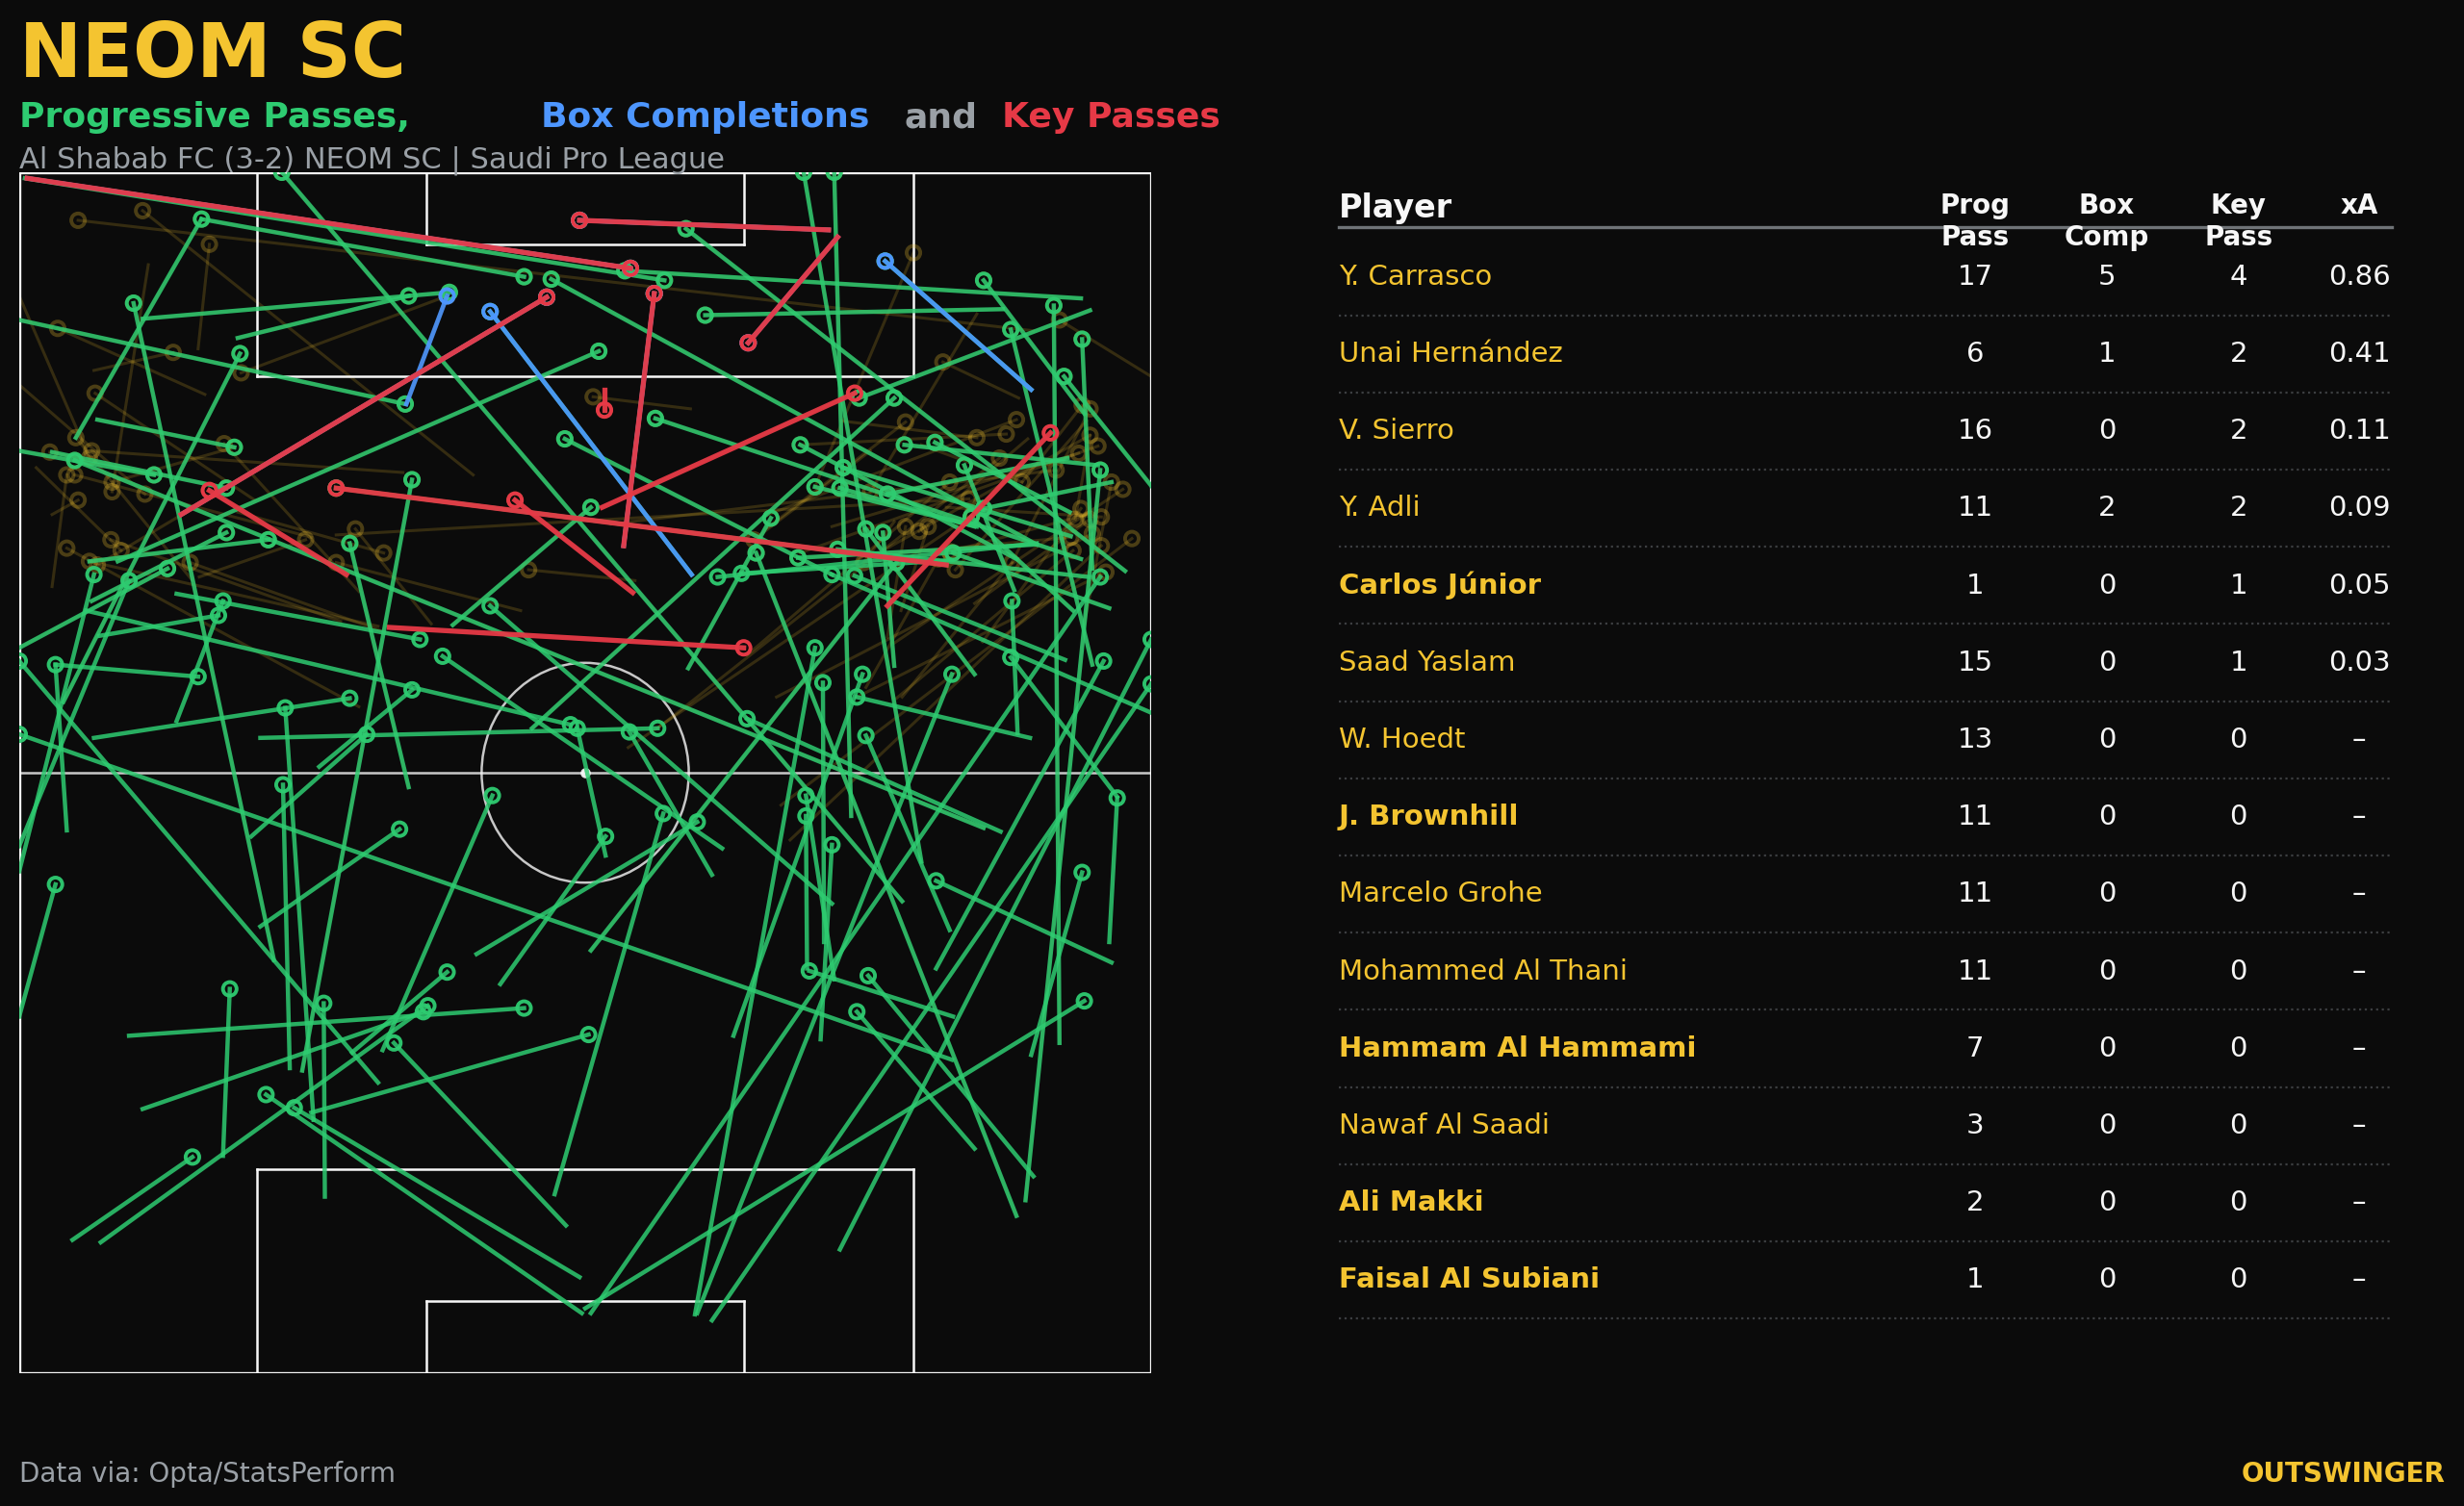

Saved PNG: /Users/user/XG/Saudi/DONE/prog_box_keypasses_black.png


In [40]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- OUTSWINGER COLOR PALETTE ---
OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "emerald": "#2ECC71",
    "crimson": "#E63946",
    "blue":    "#4D96FF",
    "violet":  "#7B61FF",
}

# ----------------------------
# SETTINGS
# ----------------------------
json_path = "/Users/user/XG/Saudi/DONE/2026-01-14_Al Shabab FC - NEOM SC.json"
csv_path  = "/Users/user/XG/Saudi/xgCSV/2026-01-14_Al Shabab FC - NEOM SC.csv"

team_to_plot = "NEOM SC"
match_line = "Al Shabab FC (3-2) NEOM SC | Saudi Pro League"

json_out_path = "/Users/user/XG/Saudi/DONE/2026-01-14_Al Shabab FC - NEOM SC_with_xA.json"
out_png = "/Users/user/XG/Saudi/DONE/prog_box_keypasses_black.png"

# Colors
COL_PROG = OUTSWINGER["emerald"]
COL_BOX  = OUTSWINGER["blue"]
COL_KEY  = OUTSWINGER["crimson"]
COL_F3   = OUTSWINGER["yellow"]  # faint layer

BG = OUTSWINGER["black"]
FG = OUTSWINGER["white"]
MUTED = OUTSWINGER["grey"]
ACCENT = OUTSWINGER["yellow"]

# Feed knobs
KEY_PASS_QUALIFIER_ID = 210
direction_left_to_right = True
PROG_THRESHOLD = 8.0
FINAL_THIRD_Y = 66.7

# ----------------------------
# HELPERS
# ----------------------------
def find_events(obj):
    if isinstance(obj, dict):
        for k, v in obj.items():
            if k == "event" and isinstance(v, list):
                return v
            for vv in obj.values():
                res = find_events(vv)
                if res is not None:
                    return res
    elif isinstance(obj, list):
        for it in obj:
            res = find_events(it)
            if res is not None:
                return res
    return None

def qmap(qual_list):
    d = {}
    if not isinstance(qual_list, list):
        return d
    for q in qual_list:
        if not isinstance(q, dict):
            continue
        qid = q.get("qualifierId")
        if qid is None:
            continue
        d[qid] = q.get("value", True)
    return d

def draw_vertical_pitch(ax):
    ax.set_facecolor(BG)

    ax.plot([0, 0], [0, 100], color=FG, lw=1.2)
    ax.plot([100, 100], [0, 100], color=FG, lw=1.2)
    ax.plot([0, 100], [0, 0], color=FG, lw=1.2)
    ax.plot([0, 100], [100, 100], color=FG, lw=1.2)

    ax.plot([0, 100], [50, 50], color=FG, lw=0.9, alpha=0.8)

    ax.add_patch(plt.Circle((50, 50), 9.15, fill=False, color=FG, lw=0.9, alpha=0.8))
    ax.scatter([50], [50], s=8, color=FG, alpha=0.9)

    ax.plot([21, 79], [0, 0], color=FG, lw=0.9)
    ax.plot([21, 21], [0, 17], color=FG, lw=0.9)
    ax.plot([79, 79], [0, 17], color=FG, lw=0.9)
    ax.plot([21, 79], [17, 17], color=FG, lw=0.9)

    ax.plot([21, 79], [100, 100], color=FG, lw=0.9)
    ax.plot([21, 21], [100, 83], color=FG, lw=0.9)
    ax.plot([79, 79], [100, 83], color=FG, lw=0.9)
    ax.plot([21, 79], [83, 83], color=FG, lw=0.9)

    ax.plot([36, 64], [0, 0], color=FG, lw=0.9)
    ax.plot([36, 36], [0, 6], color=FG, lw=0.9)
    ax.plot([64, 64], [0, 6], color=FG, lw=0.9)
    ax.plot([36, 64], [6, 6], color=FG, lw=0.9)

    ax.plot([36, 64], [100, 100], color=FG, lw=0.9)
    ax.plot([36, 36], [100, 94], color=FG, lw=0.9)
    ax.plot([64, 64], [100, 94], color=FG, lw=0.9)
    ax.plot([36, 64], [94, 94], color=FG, lw=0.9)

    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xticks([])
    ax.set_yticks([])
    for s in ax.spines.values():
        s.set_visible(False)

def is_progressive_vec(sx, sy, ex, ey, threshold=8.0):
    goal = np.array([50.0, 100.0])
    s = np.column_stack([sx, sy])
    e = np.column_stack([ex, ey])
    d0 = np.sqrt(((goal - s) ** 2).sum(axis=1))
    d1 = np.sqrt(((goal - e) ** 2).sum(axis=1))
    prog = (d0 - d1) >= threshold
    length = np.sqrt(((e - s) ** 2).sum(axis=1)) >= 10.0
    return prog & length

# ----------------------------
# 1) CALCULATE xA FROM CSV (BY NAME) + APPEND INTO JSON
# ----------------------------
shots = pd.read_csv(csv_path)
shots["relatedPlayerId"] = shots["relatedPlayerId"].astype(str)
shots["xG"] = pd.to_numeric(shots["xG"], errors="coerce")

xa_map = (
    shots.dropna(subset=["xG"])
         .groupby("relatedPlayerId")["xG"]
         .sum()
         .to_dict()
)

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

events = find_events(data)
if not events:
    raise ValueError("Could not find an 'event' list in the JSON.")

for ev in events:
    pname = ev.get("playerName")
    ev["xA"] = float(xa_map.get(str(pname), 0.0)) if pname is not None else 0.0

with open(json_out_path, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False)

print("Saved JSON with xA appended:", json_out_path)

# ----------------------------
# 2) BUILD PLOT DATA
# ----------------------------
rows = []
for ev in events:
    rows.append({
        "typeId": ev.get("typeId"),
        "contestantId": ev.get("contestantId"),
        "playerName": ev.get("playerName"),
        "outcome": ev.get("outcome"),
        "x": ev.get("x"),
        "y": ev.get("y"),
        "qual": qmap(ev.get("qualifier", [])),
        "xA": ev.get("xA", 0.0),
    })

df = pd.DataFrame(rows)
df["typeId"] = pd.to_numeric(df["typeId"], errors="coerce")
df["outcome"] = pd.to_numeric(df["outcome"], errors="coerce")
df["x"] = pd.to_numeric(df["x"], errors="coerce")
df["y"] = pd.to_numeric(df["y"], errors="coerce")
df["xA"] = pd.to_numeric(df["xA"], errors="coerce").fillna(0.0)

team_ids = [t for t in df["contestantId"].dropna().unique()]
if len(team_ids) < 2:
    raise ValueError("Could not detect two teams (contestantId).")

TEAM_A, TEAM_B = team_ids[0], team_ids[1]
team_id_plot = TEAM_B if team_to_plot.strip().lower() == "neom sc" else TEAM_A

passes = df[(df["typeId"] == 1) & (df["contestantId"] == team_id_plot)].copy()
passes = passes.dropna(subset=["x", "y", "playerName"])

passes["endX"] = passes["qual"].apply(lambda d: d.get(140) if isinstance(d, dict) else np.nan)
passes["endY"] = passes["qual"].apply(lambda d: d.get(141) if isinstance(d, dict) else np.nan)
passes["endX"] = pd.to_numeric(passes["endX"], errors="coerce")
passes["endY"] = pd.to_numeric(passes["endY"], errors="coerce")
passes = passes.dropna(subset=["endX", "endY"])

x = passes["x"].to_numpy(float)
y = passes["y"].to_numpy(float)
endx = passes["endX"].to_numpy(float)
endy = passes["endY"].to_numpy(float)

if not direction_left_to_right:
    x = 100 - x
    endx = 100 - endx

passes["sx"] = y
passes["sy"] = x
passes["ex"] = endy
passes["ey"] = endx

passes["box_comp"] = (passes["outcome"] == 1) & (passes["ex"].between(21, 79)) & (passes["ey"] >= 83)
passes["progressive"] = is_progressive_vec(
    passes["sx"].to_numpy(float), passes["sy"].to_numpy(float),
    passes["ex"].to_numpy(float), passes["ey"].to_numpy(float),
    threshold=PROG_THRESHOLD
)
passes["key_pass"] = passes["qual"].apply(lambda d: isinstance(d, dict) and (KEY_PASS_QUALIFIER_ID in d))
passes["final_third_pass"] = passes["ey"] >= FINAL_THIRD_Y

plot_passes = passes.loc[
    passes["progressive"] | passes["box_comp"] | passes["key_pass"] | passes["final_third_pass"],
    ["playerName","sx","sy","ex","ey","progressive","box_comp","key_pass","final_third_pass"]
].copy()

# Table from ALL passes
xa_by_name = passes.groupby("playerName")["xA"].max()
tbl = (
    passes.groupby("playerName", dropna=True)
    .agg(
        prog_pass=("progressive", "sum"),
        box_comp=("box_comp", "sum"),
        key_pass=("key_pass", "sum"),
        total_pass=("playerName", "size"),
    )
    .reset_index()
)
tbl["xA"] = tbl["playerName"].map(xa_by_name).fillna(0.0)
tbl = tbl.sort_values(["xA", "key_pass", "prog_pass", "box_comp", "total_pass"], ascending=False).head(15)

# ----------------------------
# FIGURE
# ----------------------------
fig = plt.figure(figsize=(14, 8), dpi=200)
fig.patch.set_facecolor(BG)

ax_pitch = fig.add_axes([0.05, 0.10, 0.42, 0.78])
ax_tbl   = fig.add_axes([0.52, 0.10, 0.43, 0.78])
ax_hdr   = fig.add_axes([0.05, 0.90, 0.90, 0.08])

for ax in [ax_tbl, ax_hdr]:
    ax.set_facecolor(BG)
    ax.axis("off")

# --- TITLE in YELLOW ---
ax_hdr.text(0.00, 0.70, team_to_plot, color=ACCENT, fontsize=28, fontweight="bold", ha="left", va="center")

ax_hdr.text(0.00, 0.20, "Progressive Passes,", color=COL_PROG, fontsize=13, fontweight="bold", ha="left", va="center")
ax_hdr.text(0.215, 0.20, "Box Completions", color=COL_BOX, fontsize=13, fontweight="bold", ha="left", va="center")
ax_hdr.text(0.365, 0.20, "and", color=MUTED, fontsize=13, fontweight="bold", ha="left", va="center")
ax_hdr.text(0.405, 0.20, "Key Passes", color=COL_KEY, fontsize=13, fontweight="bold", ha="left", va="center")
ax_hdr.text(0.00, -0.15, match_line, color=MUTED, fontsize=11, ha="left", va="center")

draw_vertical_pitch(ax_pitch)

def draw_passes(df_slice, color, lw=1.6, alpha=0.85, z=3):
    if len(df_slice) == 0:
        return
    ax_pitch.plot([df_slice["sx"], df_slice["ex"]], [df_slice["sy"], df_slice["ey"]],
                  color=color, lw=lw, alpha=alpha, zorder=z)
    ax_pitch.scatter(df_slice["ex"], df_slice["ey"], s=26, facecolors="none",
                     edgecolors=color, lw=1.4, alpha=min(1.0, alpha + 0.1), zorder=z+1)

draw_passes(plot_passes[plot_passes["final_third_pass"]], COL_F3, lw=1.1, alpha=0.18, z=1)
draw_passes(plot_passes[plot_passes["progressive"]], COL_PROG, lw=1.6, alpha=0.85, z=3)
draw_passes(plot_passes[plot_passes["box_comp"]], COL_BOX,  lw=1.7, alpha=0.90, z=4)
draw_passes(plot_passes[plot_passes["key_pass"]], COL_KEY,  lw=1.9, alpha=0.95, z=5)

# ----------------------------
# TABLE (RIGHT) - player names in YELLOW (NEOM SC)
# ----------------------------
ax_tbl.text(0.02, 0.98, "Player", color=FG, fontsize=12, fontweight="bold", ha="left", va="top")
ax_tbl.text(0.60, 0.98, "Prog\nPass", color=FG, fontsize=10, fontweight="bold", ha="center", va="top")
ax_tbl.text(0.72, 0.98, "Box\nComp", color=FG, fontsize=10, fontweight="bold", ha="center", va="top")
ax_tbl.text(0.84, 0.98, "Key\nPass", color=FG, fontsize=10, fontweight="bold", ha="center", va="top")
ax_tbl.text(0.95, 0.98, "xA", color=FG, fontsize=10, fontweight="bold", ha="center", va="top")
ax_tbl.plot([0.02, 0.98], [0.955, 0.955], color=MUTED, lw=1.2, alpha=0.7)

row_y = 0.92
row_h = 0.055
for i, r in tbl.iterrows():
    ax_tbl.plot([0.02, 0.98], [row_y - 0.028, row_y - 0.028],
                color=MUTED, lw=0.8, alpha=0.35, ls=":")

    # Player names in yellow (since table is for NEOM SC)
    ax_tbl.text(0.02, row_y, str(r["playerName"]), color=ACCENT, fontsize=10.5,
                fontweight="bold" if i < 5 else "normal", ha="left", va="center")

    ax_tbl.text(0.60, row_y, f"{int(r['prog_pass'])}", color=FG, fontsize=10.5, ha="center", va="center")
    ax_tbl.text(0.72, row_y, f"{int(r['box_comp'])}", color=FG, fontsize=10.5, ha="center", va="center")
    ax_tbl.text(0.84, row_y, f"{int(r['key_pass'])}", color=FG, fontsize=10.5, ha="center", va="center")

    xa_val = float(r["xA"])
    ax_tbl.text(0.95, row_y, f"{xa_val:.2f}" if xa_val > 0 else "–",
                color=FG, fontsize=10.5, ha="center", va="center")

    row_y -= row_h
    if row_y < 0.08:
        break

# Footer
fig.text(0.05, 0.03, "Data via: Opta/StatsPerform", color=MUTED, fontsize=10, ha="left")
fig.text(0.95, 0.03, "OUTSWINGER", color=ACCENT, fontsize=10, ha="right", fontweight="bold")

fig.savefig(out_png, dpi=200, bbox_inches="tight", facecolor=BG, edgecolor=BG)
plt.show()

print("Saved PNG:", out_png)


Saved JSON with xA appended: /Users/user/XG/Saudi/DONE/2026-01-14_Al Shabab FC - NEOM SC_with_xA.json
Players with xA > 0 in CSV: 12


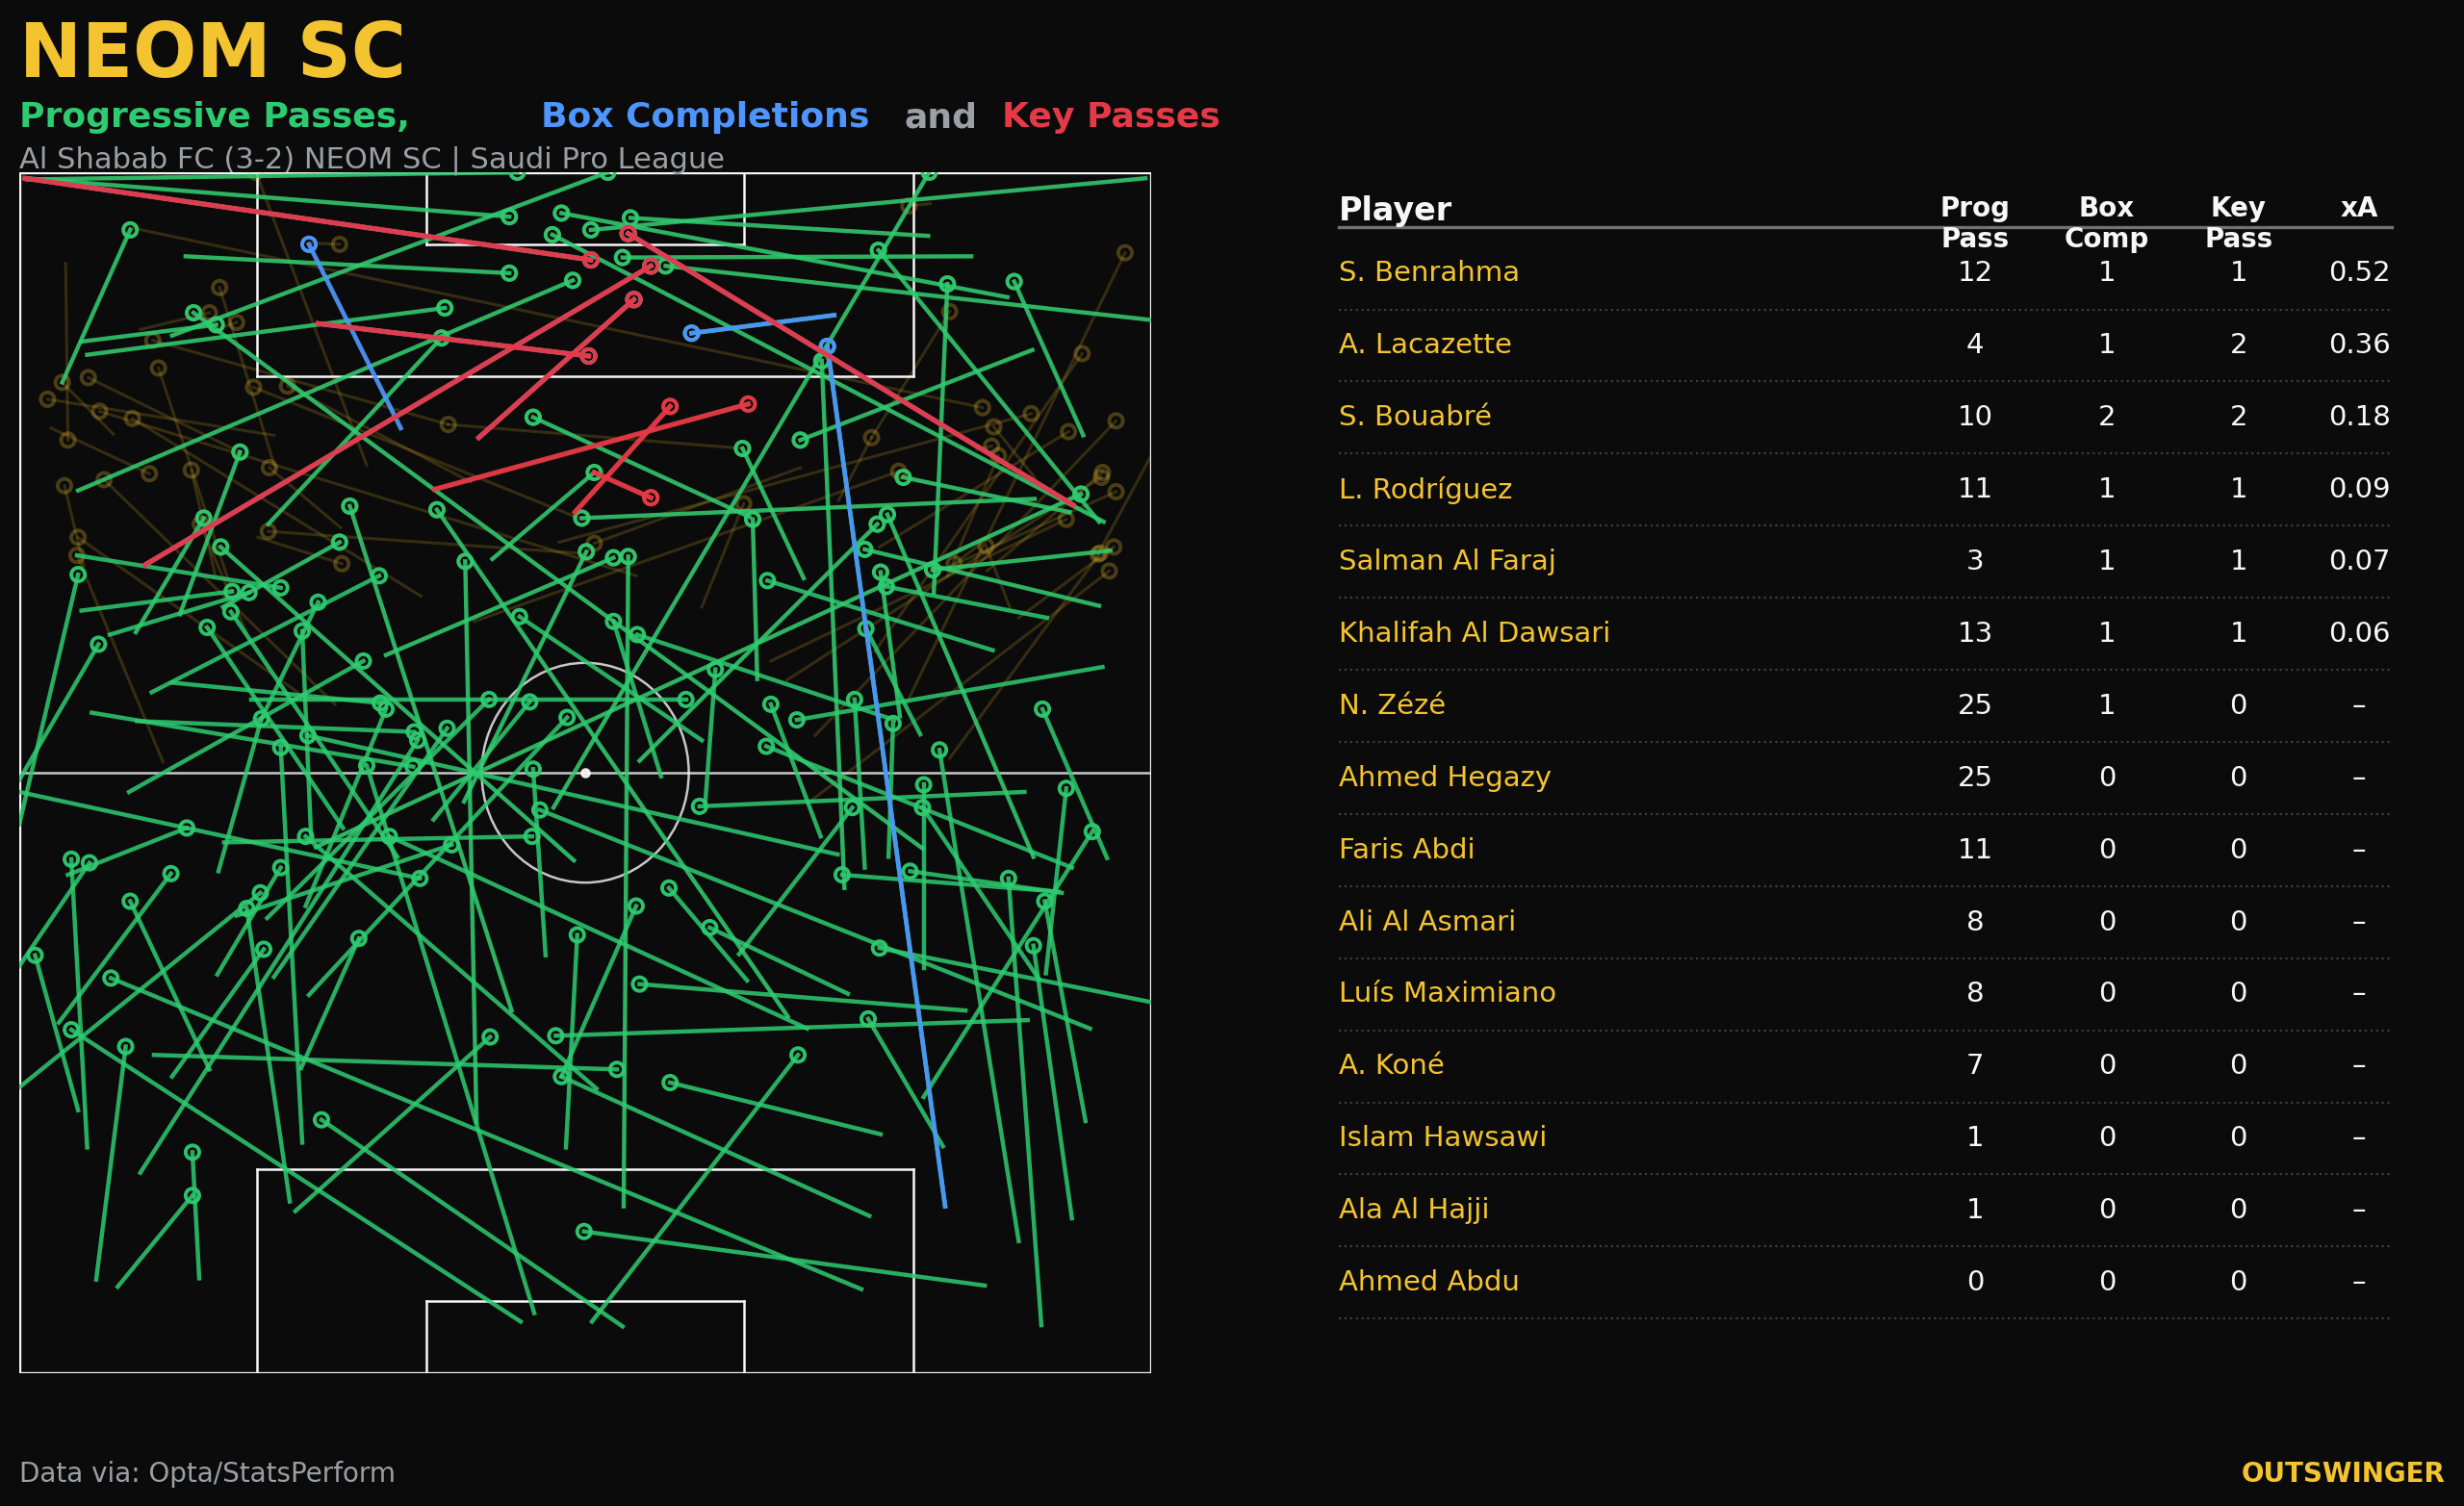

Saved PNG: /Users/user/XG/Saudi/DONE/prog_box_keypasses_black.png


In [44]:
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- OUTSWINGER COLOR PALETTE ---
OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "emerald": "#2ECC71",
    "crimson": "#E63946",
    "blue":    "#4D96FF",
    "violet":  "#7B61FF",
}

# ----------------------------
# SETTINGS
# ----------------------------
json_path = "/Users/user/XG/Saudi/DONE/2026-01-14_Al Shabab FC - NEOM SC.json"
csv_path  = "/Users/user/XG/Saudi/xgCSV/2026-01-14_Al Shabab FC - NEOM SC.csv"

matches_csv_path = "/Users/user/XG/Saudi Matches.csv"  # contestantId -> officialName mapping

team_to_plot = "NEOM SC"
match_line = "Al Shabab FC (3-2) NEOM SC | Saudi Pro League"

json_out_path = "/Users/user/XG/Saudi/DONE/2026-01-14_Al Shabab FC - NEOM SC_with_xA.json"
out_png = "/Users/user/XG/Saudi/DONE/prog_box_keypasses_black.png"

# Colors
COL_PROG = OUTSWINGER["emerald"]
COL_BOX  = OUTSWINGER["blue"]
COL_KEY  = OUTSWINGER["crimson"]
COL_F3   = OUTSWINGER["yellow"]  # faint layer

BG = OUTSWINGER["black"]
FG = OUTSWINGER["white"]
MUTED = OUTSWINGER["grey"]
ACCENT = OUTSWINGER["yellow"]

# Feed knobs
KEY_PASS_QUALIFIER_ID = 210
direction_left_to_right = True
PROG_THRESHOLD = 8.0
FINAL_THIRD_Y = 66.7

# ----------------------------
# HELPERS
# ----------------------------
def find_events(obj):
    if isinstance(obj, dict):
        for k, v in obj.items():
            if k == "event" and isinstance(v, list):
                return v
        for v in obj.values():
            res = find_events(v)
            if res is not None:
                return res
    elif isinstance(obj, list):
        for it in obj:
            res = find_events(it)
            if res is not None:
                return res
    return None

def qmap(qual_list):
    d = {}
    if not isinstance(qual_list, list):
        return d
    for q in qual_list:
        if not isinstance(q, dict):
            continue
        qid = q.get("qualifierId")
        if qid is None:
            continue
        d[qid] = q.get("value", True)
    return d

def draw_vertical_pitch(ax):
    ax.set_facecolor(BG)

    ax.plot([0, 0], [0, 100], color=FG, lw=1.2)
    ax.plot([100, 100], [0, 100], color=FG, lw=1.2)
    ax.plot([0, 100], [0, 0], color=FG, lw=1.2)
    ax.plot([0, 100], [100, 100], color=FG, lw=1.2)

    ax.plot([0, 100], [50, 50], color=FG, lw=0.9, alpha=0.8)

    ax.add_patch(plt.Circle((50, 50), 9.15, fill=False, color=FG, lw=0.9, alpha=0.8))
    ax.scatter([50], [50], s=8, color=FG, alpha=0.9)

    ax.plot([21, 79], [0, 0], color=FG, lw=0.9)
    ax.plot([21, 21], [0, 17], color=FG, lw=0.9)
    ax.plot([79, 79], [0, 17], color=FG, lw=0.9)
    ax.plot([21, 79], [17, 17], color=FG, lw=0.9)

    ax.plot([21, 79], [100, 100], color=FG, lw=0.9)
    ax.plot([21, 21], [100, 83], color=FG, lw=0.9)
    ax.plot([79, 79], [100, 83], color=FG, lw=0.9)
    ax.plot([21, 79], [83, 83], color=FG, lw=0.9)

    ax.plot([36, 64], [0, 0], color=FG, lw=0.9)
    ax.plot([36, 36], [0, 6], color=FG, lw=0.9)
    ax.plot([64, 64], [0, 6], color=FG, lw=0.9)
    ax.plot([36, 64], [6, 6], color=FG, lw=0.9)

    ax.plot([36, 64], [100, 100], color=FG, lw=0.9)
    ax.plot([36, 36], [100, 94], color=FG, lw=0.9)
    ax.plot([64, 64], [100, 94], color=FG, lw=0.9)
    ax.plot([36, 64], [94, 94], color=FG, lw=0.9)

    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xticks([])
    ax.set_yticks([])
    for s in ax.spines.values():
        s.set_visible(False)

def is_progressive_vec(sx, sy, ex, ey, threshold=8.0):
    goal = np.array([50.0, 100.0])
    s = np.column_stack([sx, sy])
    e = np.column_stack([ex, ey])
    d0 = np.sqrt(((goal - s) ** 2).sum(axis=1))
    d1 = np.sqrt(((goal - e) ** 2).sum(axis=1))
    prog = (d0 - d1) >= threshold
    length = np.sqrt(((e - s) ** 2).sum(axis=1)) >= 10.0
    return prog & length

def norm_team(s):
    s = "" if s is None else str(s)
    s = s.lower().strip()
    s = re.sub(r"[^a-z0-9]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def norm_name(v):
    """Normalize player names so CSV and JSON keys match."""
    if v is None:
        return None
    s = str(v).strip()
    if s == "" or s.lower() == "nan":
        return None
    s = " ".join(s.split())
    return s.lower()

def parse_date_from_path(path_str):
    m = re.search(r"(\d{4}-\d{2}-\d{2})", str(path_str))
    return m.group(1) if m else None

def parse_teams_from_filename(path_str):
    base = str(path_str).split("/")[-1]
    base = re.sub(r"\.[^.]+$", "", base)
    m = re.match(r"\d{4}-\d{2}-\d{2}_(.+?)\s*-\s*(.+)$", base)
    if not m:
        return None, None
    return m.group(1).strip(), m.group(2).strip()

def find_match_row_matches_csv(matches_csv_path, home_team, away_team, match_date=None):
    """
    Finds match row using fuzzy matching on:
      matchInfo/contestant/0/officialName
      matchInfo/contestant/1/officialName
    """
    m = pd.read_csv(matches_csv_path)

    c0_nm_col = "matchInfo/contestant/0/officialName"
    c1_nm_col = "matchInfo/contestant/1/officialName"
    if c0_nm_col not in m.columns or c1_nm_col not in m.columns:
        raise ValueError(f"Matches CSV missing columns: {c0_nm_col} and/or {c1_nm_col}")

    h = norm_team(home_team)
    a = norm_team(away_team)

    c0 = m[c0_nm_col].astype(str).map(norm_team)
    c1 = m[c1_nm_col].astype(str).map(norm_team)

    def fuzzy(x, y):
        return (x == y) or (x in y) or (y in x)

    mask = []
    for x, y in zip(c0.tolist(), c1.tolist()):
        ok1 = fuzzy(x, h) and fuzzy(y, a)
        ok2 = fuzzy(x, a) and fuzzy(y, h)
        mask.append(ok1 or ok2)

    cand = m[pd.Series(mask, index=m.index)].copy()

    if match_date and len(cand) > 1:
        date_cols = [c for c in m.columns if any(k in c.lower() for k in ["date", "time", "kick", "start", "utc"])]
        for dc in date_cols:
            sub = cand[dc].astype(str).str.contains(match_date, na=False)
            if sub.any():
                cand = cand[sub].copy()
                break

    if len(cand) == 0:
        sample = m[[c0_nm_col, c1_nm_col]].head(8)
        raise ValueError(
            "Could not find the match row in Saudi Matches.csv.\n"
            f"Looking for: '{home_team}' vs '{away_team}' (date: {match_date}).\n"
            f"First rows of officialNames:\n{sample}"
        )

    return cand.iloc[0]

def build_contestant_map_from_row(row):
    c0_id = str(row.get("matchInfo/contestant/0/id", "")).strip()
    c0_nm = str(row.get("matchInfo/contestant/0/officialName", "")).strip()
    c1_id = str(row.get("matchInfo/contestant/1/id", "")).strip()
    c1_nm = str(row.get("matchInfo/contestant/1/officialName", "")).strip()
    cmap = {}
    if c0_id: cmap[c0_id] = c0_nm
    if c1_id: cmap[c1_id] = c1_nm
    if not cmap:
        raise ValueError("Match row found but contestant id/name fields were empty.")
    return cmap

# ----------------------------
# 1) CALCULATE xA FROM CSV (BY NAME) + APPEND INTO JSON ✅
# ----------------------------
shots = pd.read_csv(csv_path)
shots["xG"] = pd.to_numeric(shots["xG"], errors="coerce")

# relatedPlayerId is actually assister name (same strings as JSON playerName)
shots["name_key"] = shots["relatedPlayerId"].apply(norm_name)

xa_map = (
    shots.dropna(subset=["xG", "name_key"])
         .groupby("name_key")["xG"]
         .sum()
         .to_dict()
)

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

events = find_events(data)
if not events:
    raise ValueError("Could not find an 'event' list in the JSON.")

for ev in events:
    key = norm_name(ev.get("playerName"))
    ev["xA"] = float(xa_map.get(key, 0.0)) if key is not None else 0.0

with open(json_out_path, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False)

print("Saved JSON with xA appended:", json_out_path)
print("Players with xA > 0 in CSV:", sum(1 for v in xa_map.values() if v > 0))

# ----------------------------
# 2) BUILD EVENT DATAFRAME
# ----------------------------
rows = []
for ev in events:
    rows.append({
        "typeId": ev.get("typeId"),
        "contestantId": ev.get("contestantId"),
        "playerId": ev.get("playerId"),
        "playerName": ev.get("playerName"),
        "outcome": ev.get("outcome"),
        "x": ev.get("x"),
        "y": ev.get("y"),
        "qual": qmap(ev.get("qualifier", [])),
        "xA": ev.get("xA", 0.0),
    })

df = pd.DataFrame(rows)
df["typeId"] = pd.to_numeric(df["typeId"], errors="coerce")
df["outcome"] = pd.to_numeric(df["outcome"], errors="coerce")
df["x"] = pd.to_numeric(df["x"], errors="coerce")
df["y"] = pd.to_numeric(df["y"], errors="coerce")
df["xA"] = pd.to_numeric(df["xA"], errors="coerce").fillna(0.0)

# ----------------------------
# contestantId -> officialName mapping (robust matching)
# ----------------------------
match_date = parse_date_from_path(json_path) or parse_date_from_path(csv_path)
home_team, away_team = parse_teams_from_filename(json_path)
if home_team is None or away_team is None:
    raise ValueError("Could not parse teams from filename. Keep: YYYY-MM-DD_Home - Away.json")

row_match = find_match_row_matches_csv(matches_csv_path, home_team, away_team, match_date=match_date)
contestant_map = build_contestant_map_from_row(row_match)

df["teamName"] = df["contestantId"].astype(str).map(contestant_map)

# ----------------------------
# PASSES: ONLY team_to_plot (guarantees TABLE is NEOM-only)
# ----------------------------
passes = df[df["typeId"] == 1].copy()
passes = passes.dropna(subset=["x", "y", "playerName", "contestantId"])
passes = passes[passes["teamName"].astype(str).map(norm_team) == norm_team(team_to_plot)].copy()

if len(passes) == 0:
    raise ValueError(
        f"No passes found after filtering to '{team_to_plot}'.\n"
        f"Mapped teams were: {set(contestant_map.values())}"
    )

# ----------------------------
# PASS END LOCATIONS + FLAGS
# ----------------------------
passes["endX"] = passes["qual"].apply(lambda d: d.get(140) if isinstance(d, dict) else np.nan)
passes["endY"] = passes["qual"].apply(lambda d: d.get(141) if isinstance(d, dict) else np.nan)
passes["endX"] = pd.to_numeric(passes["endX"], errors="coerce")
passes["endY"] = pd.to_numeric(passes["endY"], errors="coerce")
passes = passes.dropna(subset=["endX", "endY"])

x = passes["x"].to_numpy(float)
y = passes["y"].to_numpy(float)
endx = passes["endX"].to_numpy(float)
endy = passes["endY"].to_numpy(float)

if not direction_left_to_right:
    x = 100 - x
    endx = 100 - endx

# vertical pitch convention
passes["sx"] = y
passes["sy"] = x
passes["ex"] = endy
passes["ey"] = endx

passes["box_comp"] = (passes["outcome"] == 1) & (passes["ex"].between(21, 79)) & (passes["ey"] >= 83)
passes["progressive"] = is_progressive_vec(
    passes["sx"].to_numpy(float), passes["sy"].to_numpy(float),
    passes["ex"].to_numpy(float), passes["ey"].to_numpy(float),
    threshold=PROG_THRESHOLD
)
passes["key_pass"] = passes["qual"].apply(lambda d: isinstance(d, dict) and (KEY_PASS_QUALIFIER_ID in d))
passes["final_third_pass"] = passes["ey"] >= FINAL_THIRD_Y

plot_passes = passes.loc[
    passes["progressive"] | passes["box_comp"] | passes["key_pass"] | passes["final_third_pass"],
    ["playerName","sx","sy","ex","ey","progressive","box_comp","key_pass","final_third_pass"]
].copy()

# ----------------------------
# TABLE (NEOM-only because passes is NEOM-only)
# ----------------------------
xa_by_name = passes.groupby("playerName")["xA"].max()
tbl = (
    passes.groupby("playerName", dropna=True)
    .agg(
        prog_pass=("progressive", "sum"),
        box_comp=("box_comp", "sum"),
        key_pass=("key_pass", "sum"),
        total_pass=("playerName", "size"),
    )
    .reset_index()
)
tbl["xA"] = tbl["playerName"].map(xa_by_name).fillna(0.0)
tbl = tbl.sort_values(["xA", "key_pass", "prog_pass", "box_comp", "total_pass"], ascending=False).head(15)

# ----------------------------
# FIGURE
# ----------------------------
fig = plt.figure(figsize=(14, 8), dpi=200)
fig.patch.set_facecolor(BG)

ax_pitch = fig.add_axes([0.05, 0.10, 0.42, 0.78])
ax_tbl   = fig.add_axes([0.52, 0.10, 0.43, 0.78])
ax_hdr   = fig.add_axes([0.05, 0.90, 0.90, 0.08])

for ax in [ax_tbl, ax_hdr]:
    ax.set_facecolor(BG)
    ax.axis("off")

# Header
ax_hdr.text(0.00, 0.70, team_to_plot, color=ACCENT, fontsize=28, fontweight="bold", ha="left", va="center")
ax_hdr.text(0.00, 0.20, "Progressive Passes,", color=COL_PROG, fontsize=13, fontweight="bold", ha="left", va="center")
ax_hdr.text(0.215, 0.20, "Box Completions", color=COL_BOX, fontsize=13, fontweight="bold", ha="left", va="center")
ax_hdr.text(0.365, 0.20, "and", color=MUTED, fontsize=13, fontweight="bold", ha="left", va="center")
ax_hdr.text(0.405, 0.20, "Key Passes", color=COL_KEY, fontsize=13, fontweight="bold", ha="left", va="center")
ax_hdr.text(0.00, -0.15, match_line, color=MUTED, fontsize=11, ha="left", va="center")

draw_vertical_pitch(ax_pitch)

def draw_passes(df_slice, color, lw=1.6, alpha=0.85, z=3):
    if len(df_slice) == 0:
        return
    ax_pitch.plot([df_slice["sx"], df_slice["ex"]], [df_slice["sy"], df_slice["ey"]],
                  color=color, lw=lw, alpha=alpha, zorder=z)
    ax_pitch.scatter(df_slice["ex"], df_slice["ey"], s=26, facecolors="none",
                     edgecolors=color, lw=1.4, alpha=min(1.0, alpha + 0.1), zorder=z+1)

draw_passes(plot_passes[plot_passes["final_third_pass"]], COL_F3, lw=1.1, alpha=0.18, z=1)
draw_passes(plot_passes[plot_passes["progressive"]], COL_PROG, lw=1.6, alpha=0.85, z=3)
draw_passes(plot_passes[plot_passes["box_comp"]], COL_BOX,  lw=1.7, alpha=0.90, z=4)
draw_passes(plot_passes[plot_passes["key_pass"]], COL_KEY,  lw=1.9, alpha=0.95, z=5)

# ----------------------------
# TABLE (RIGHT) - NO BOLD NAMES
# ----------------------------
ax_tbl.text(0.02, 0.98, "Player", color=FG, fontsize=12, fontweight="bold", ha="left", va="top")
ax_tbl.text(0.60, 0.98, "Prog\nPass", color=FG, fontsize=10, fontweight="bold", ha="center", va="top")
ax_tbl.text(0.72, 0.98, "Box\nComp", color=FG, fontsize=10, fontweight="bold", ha="center", va="top")
ax_tbl.text(0.84, 0.98, "Key\nPass", color=FG, fontsize=10, fontweight="bold", ha="center", va="top")
ax_tbl.text(0.95, 0.98, "xA", color=FG, fontsize=10, fontweight="bold", ha="center", va="top")
ax_tbl.plot([0.02, 0.98], [0.955, 0.955], color=MUTED, lw=1.2, alpha=0.7)

row_y = 0.92
row_h = 0.055
for _, r in tbl.iterrows():
    ax_tbl.plot([0.02, 0.98], [row_y - 0.028, row_y - 0.028],
                color=MUTED, lw=0.8, alpha=0.35, ls=":")

    ax_tbl.text(0.02, row_y, str(r["playerName"]),
                color=ACCENT, fontsize=10.5,
                fontweight="normal", ha="left", va="center")

    ax_tbl.text(0.60, row_y, f"{int(r['prog_pass'])}", color=FG, fontsize=10.5, ha="center", va="center")
    ax_tbl.text(0.72, row_y, f"{int(r['box_comp'])}", color=FG, fontsize=10.5, ha="center", va="center")
    ax_tbl.text(0.84, row_y, f"{int(r['key_pass'])}", color=FG, fontsize=10.5, ha="center", va="center")

    xa_val = float(r["xA"])
    ax_tbl.text(0.95, row_y, f"{xa_val:.2f}" if xa_val > 0 else "–",
                color=FG, fontsize=10.5, ha="center", va="center")

    row_y -= row_h
    if row_y < 0.08:
        break

# Footer
fig.text(0.05, 0.03, "Data via: Opta/StatsPerform", color=MUTED, fontsize=10, ha="left")
fig.text(0.95, 0.03, "OUTSWINGER", color=ACCENT, fontsize=10, ha="right", fontweight="bold")

fig.savefig(out_png, dpi=200, bbox_inches="tight", facecolor=BG, edgecolor=BG)
plt.show()

print("Saved PNG:", out_png)


In [11]:
import os
import glob
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# ============================
# STYLE & PALETTE
# ============================
OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "grid":    "#222222"
}

BG, FG = OUTSWINGER["black"], OUTSWINGER["white"]
MUTED  = OUTSWINGER["grey"]
DOT    = OUTSWINGER["grey"]    
CUR    = OUTSWINGER["yellow"]  
TEAMC  = OUTSWINGER["yellow"]  
LGC    = OUTSWINGER["white"]   

# ============================
# PATHS / SETTINGS
# ============================
DONE_DIR    = "/Users/user/XG/Saudi/DONE"
MATCHES_CSV = "/Users/user/XG/Saudi Matches.csv"
XGCSV_DIR   = "/Users/user/XG/Saudi/xgCSV"

TEAM        = "NEOM SC"

OUT_DIR = os.path.join(DONE_DIR, "NEOM_CannonStyle_Black")
os.makedirs(OUT_DIR, exist_ok=True)

# ============================
# ROBUST HELPERS
# ============================
def norm_team(s):
    if s is None: return ""
    s = str(s).lower().strip()
    s = re.sub(r"[^a-z0-9\s]+", "", s)
    return re.sub(r"\s+", " ", s).strip()

def find_events(obj):
    if isinstance(obj, dict):
        if "event" in obj: return obj["event"]
        for v in obj.values():
            res = find_events(v)
            if res: return res
    elif isinstance(obj, list):
        for it in obj:
            res = find_events(it)
            if res: return res
    return None

def qmap(qual_list):
    return {q.get("qualifierId"): q.get("value", True) for q in qual_list if isinstance(q, dict)}

def get_team_xg(xg_df, team_name, team_cid, match_date="Unknown"):
    """Fixed: Matches team_name against the string-based TeamId column."""
    if xg_df is None or xg_df.empty: return np.nan
    xg_df.columns = [str(c).strip() for c in xg_df.columns]
    xg_col = next((c for c in xg_df.columns if c.lower() == 'xg'), None)
    if not xg_col: return np.nan
    xg_df[xg_col] = pd.to_numeric(xg_df[xg_col], errors='coerce').fillna(0)

    id_col = next((c for c in xg_df.columns if c.lower() == 'teamid'), None)
    name_col = next((c for c in xg_df.columns if c.lower() in ['team', 'teamname', 'team_name']), None)
    
    # Priority: Match against 'TeamId' (which contains names in your CSV)
    if id_col:
        mask = xg_df[id_col].astype(str).apply(norm_team) == norm_team(team_name)
        if mask.any(): return float(xg_df.loc[mask, xg_col].sum())
    if name_col:
        mask = xg_df[name_col].astype(str).apply(norm_team) == norm_team(team_name)
        if mask.any(): return float(xg_df.loc[mask, xg_col].sum())
    return 0.0 

# ============================
# METRICS & PLOTTING
# ============================
def compute_metrics(events_df, cid, direction, xg_df, name, match_date):
    df = events_df[events_df["contestantId"] == cid].copy()
    df["x_std"] = df["x"].apply(lambda v: 100 - v if direction == "RTL" else v)
    df["y_std"] = df["y"]
    passes = df[df["typeId"] == 1].copy()
    
    def is_prog(row):
        try:
            q = row["qual"]
            if 140 not in q: return False
            x1, y1 = row["x_std"], row["y_std"]
            x2 = 100 - float(q[140]) if direction == "RTL" else float(q[140])
            y2 = float(q[141])
            d1 = np.sqrt((100-x1)**2 + (50-y1)**2)
            d2 = np.sqrt((100-x2)**2 + (50-y2)**2)
            return (d1 - d2) >= 8.0 and np.sqrt((x2-x1)**2 + (y2-y1)**2) >= 10.0
        except: return False

    return {
        "xG": get_team_xg(xg_df, name, cid, match_date),
        "Shots": float(df[df["typeId"].isin([13,14,15,16])].shape[0]),
        "Shots on target": float(df[df["typeId"].isin([15,16])].shape[0]),
        "Field Tilt Proxy": float(passes[passes["x_std"] >= 66.7].shape[0]),
        "Deep Touches": float(df[df["x_std"] >= 80].shape[0]),
        "Touches in the box": float(df[(df["x_std"] >= 83) & (df["y_std"].between(21,79))].shape[0]),
        "Progressive Passes": float(passes.apply(is_prog, axis=1).sum() if not passes.empty else 0),
        "Passes Attempted": float(len(passes)),
        "Dribbles Completed": float(df[(df["typeId"]==3) & (df["outcome"]==1)].shape[0]),
        "Progressive Carries": float(df[(df["typeId"].isin([3,49])) & (df["x_std"]>=50)].shape[0]),
        "Fouls Suffered": float(df[df["typeId"]==4].shape[0]),
        "Attack Third Play": float(df[df["x_std"] >= 66.7].shape[0]),
        "Mid Third Play": float(df[df["x_std"].between(33.3, 66.7)].shape[0]),
        "Def Third Play": float(df[df["x_std"] < 33.3].shape[0]),
        "Crosses Attempted": float(passes["qual"].apply(lambda q: any(k in q for k in [2,5,6])).sum() if not passes.empty else 0)
    }

def build_viz(team_name, match_title, team_df, lg_df, current_row, out_path):
    metrics = ["xG", "Shots", "Shots on target", "Field Tilt", "Deep Touches", "Touches in the box",
               "Progressive Passes", "Passes Attempted", "Progressive Carries", "Dribbles Completed", 
               "Fouls Suffered", "Attack Third Play", "Mid Third Play", "Def Third Play", "Crosses Attempted"]

    fig = plt.figure(figsize=(18, 12), dpi=200, facecolor=BG)
    fig.text(0.04, 0.94, team_name, fontsize=34, fontweight="bold", color=FG)
    fig.text(0.04, 0.905, match_title, fontsize=16, color=FG)
    fig.text(0.04, 0.88, "Compared to season distribution (Saudi Pro League)", fontsize=14, color=MUTED)

    l, r, t, b = 0.05, 0.95, 0.83, 0.12
    cols, rows = 3, 5
    w, h = (r-l)/cols, (t-b)/rows

    for i, m in enumerate(metrics):
        ax = fig.add_axes([l + (i%cols)*w + 0.01, t - (i//cols + 1)*h + 0.03, w - 0.04, h - 0.07])
        ax.set_facecolor(BG)
        ax.set_title(m, color=FG, fontsize=13, fontweight="bold", loc='left', pad=10)
        
        t_vals = pd.to_numeric(team_df[m], errors='coerce').fillna(0)
        l_vals = pd.to_numeric(lg_df[m], errors='coerce').fillna(0)
        curr_val = float(current_row[m])

        if not t_vals.empty:
            jitter = np.random.uniform(-0.04, 0.04, size=len(t_vals))
            ax.scatter(t_vals, jitter, s=220, color=DOT, alpha=0.28, zorder=2, edgecolors="none")
            ax.axvline(t_vals.mean(), color=TEAMC, lw=2.0, alpha=0.85, zorder=3)
            if not l_vals.empty:
                ax.axvline(l_vals.mean(), color=LGC, lw=2.0, alpha=0.85, zorder=3)
            
            if not np.isnan(curr_val):
                ax.scatter([curr_val], [0], s=320, color=CUR, edgecolors=FG, lw=1.8, zorder=10)

            mn, mx = t_vals.min(), t_vals.max()
            if not np.isnan(curr_val): mn, mx = min(mn, curr_val), max(mx, curr_val)
            pad = (mx - mn) * 0.20 if mx > mn else 0.5
            ax.set_xlim(mn - pad, mx + pad)

        ax.set_ylim(-0.55, 0.55)
        ax.set_yticks([])
        ax.tick_params(axis='x', colors=FG, labelsize=10)
        ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
        for s in ax.spines.values(): s.set_visible(False)
        ax.grid(axis='x', color=OUTSWINGER["grid"], alpha=0.55, zorder=0)

    # LEGEND SECTION
    fig.text(0.05, 0.05, "●", color=CUR, fontsize=22, va="center")
    fig.text(0.07, 0.05, "Current match", color=FG, fontsize=12, va="center")
    fig.text(0.20, 0.05, "|", color=TEAMC, fontsize=20, va="center", fontweight="bold")
    fig.text(0.215, 0.05, f"{team_name} avg", color=TEAMC, fontsize=12, va="center")
    fig.text(0.33, 0.05, "|", color=LGC, fontsize=20, va="center", fontweight="bold")
    fig.text(0.345, 0.05, "League avg", color=FG, fontsize=12, va="center")

    plt.savefig(out_path, bbox_inches="tight", facecolor=BG)
    plt.close()

# ============================
# MAIN LOOP
# ============================
json_files = sorted(glob.glob(os.path.join(DONE_DIR, "*.json")))
all_match_data = []
match_ref_df = pd.read_csv(MATCHES_CSV)

for f_path in json_files:
    fname = os.path.basename(f_path)
    m = re.search(r"(\d{4}-\d{2}-\d{2})_(.+) - (.+)\.json", fname)
    if not m: continue
    dt, h_team, a_team = m.groups()
    
    with open(f_path, 'r', encoding='utf-8') as f: data = json.load(f)
    events = find_events(data)
    h_n, a_n = norm_team(h_team), norm_team(a_team)
    mask = match_ref_df.apply(lambda r: (norm_team(r["matchInfo/contestant/0/officialName"]) in [h_n, a_n]) and 
                                       (norm_team(r["matchInfo/contestant/1/officialName"]) in [h_n, a_n]), axis=1)
    cand = match_ref_df[mask]
    if cand.empty: continue
    row = cand.iloc[0]
    cmap = {str(row["matchInfo/contestant/0/id"]): str(row["matchInfo/contestant/0/officialName"]), 
            str(row["matchInfo/contestant/1/id"]): str(row["matchInfo/contestant/1/officialName"])}
    
    evdf = pd.DataFrame([{"typeId": int(e.get("typeId",0)), "contestantId": str(e.get("contestantId")),
                          "outcome": int(e.get("outcome",0)), "x": float(e.get("x",0)), 
                          "y": float(e.get("y",0)), "qual": qmap(e.get("qualifier",[]))} for e in events])
    
    xg_path = os.path.join(XGCSV_DIR, fname.replace(".json", ".csv"))
    xg_df = pd.read_csv(xg_path) if os.path.exists(xg_path) else None
    
    cids = list(cmap.keys())
    dir_map = {cid: "LTR" for cid in cids}
    for e in events:
        if str(e.get("typeId")) == "32":
            q = qmap(e.get("qualifier", []))
            if 127 in q and "right to left" in str(q[127]).lower():
                dir_map[str(e.get("contestantId"))] = "RTL"

    m0 = compute_metrics(evdf, cids[0], dir_map[cids[0]], xg_df, cmap[cids[0]], dt)
    m1 = compute_metrics(evdf, cids[1], dir_map[cids[1]], xg_df, cmap[cids[1]], dt)
    
    ft_sum = m0["Field Tilt Proxy"] + m1["Field Tilt Proxy"] + 1e-6
    m0["Field Tilt"], m1["Field Tilt"] = m0["Field Tilt Proxy"]/ft_sum, m1["Field Tilt Proxy"]/ft_sum
    
    all_match_data.append({"date": dt, "team": cmap[cids[0]], "match": f"{h_team} vs {a_team}", **m0})
    all_match_data.append({"date": dt, "team": cmap[cids[1]], "match": f"{h_team} vs {a_team}", **m1})

full_df = pd.DataFrame(all_match_data)
team_results = full_df[full_df["team"].map(norm_team) == norm_team(TEAM)].sort_values("date")

if not team_results.empty:
    curr = team_results.iloc[-1]
    print(f"LATEST xG: {curr['xG']}")
    out_name = os.path.join(OUT_DIR, f"{curr['date']}_Final_Dashboard.png")
    build_viz(TEAM, f"{curr['match']} | {curr['date']}", team_results, full_df, curr, out_name)
    print(f"SAVED: {out_name}")

LATEST xG: 0.9847554415464401
SAVED: /Users/user/XG/Saudi/DONE/NEOM_CannonStyle_Black/2026-01-18_Final_Dashboard.png


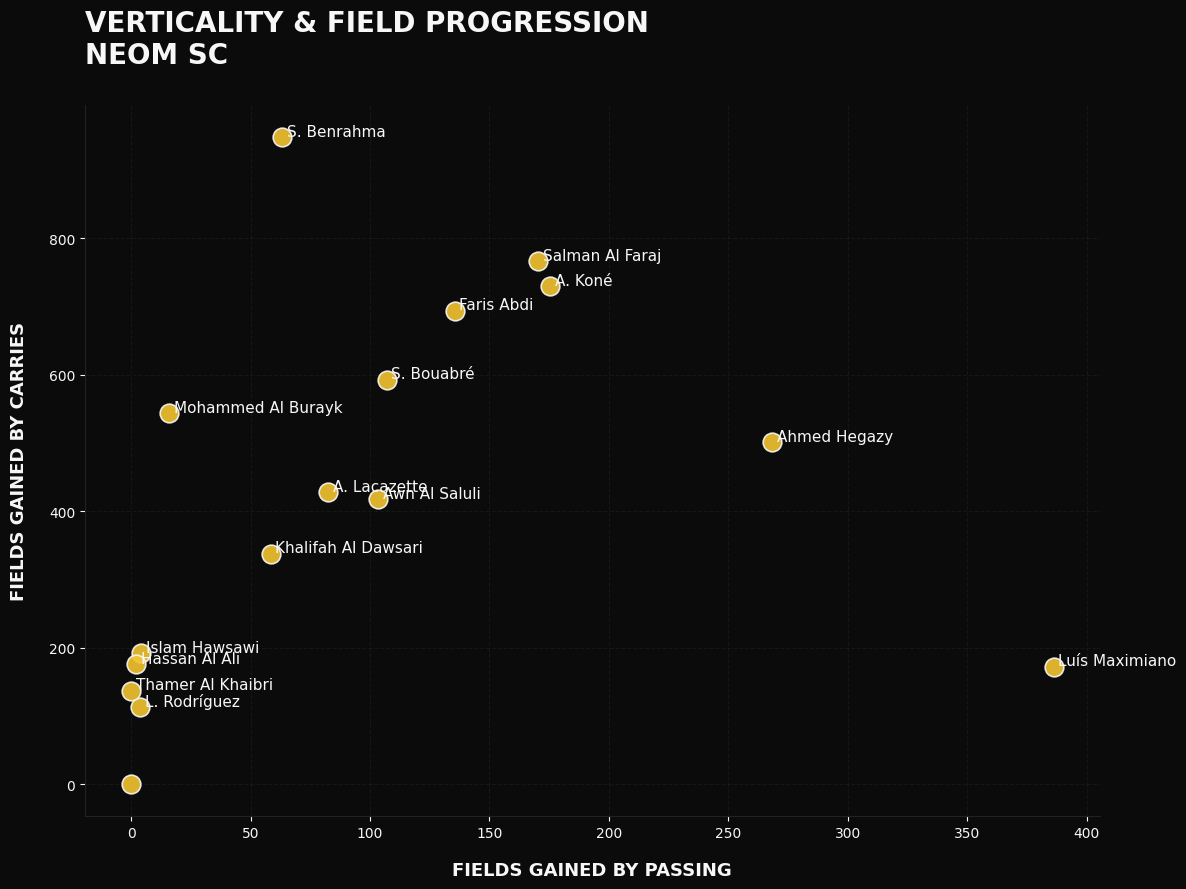

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# 1. SETUP COLOR PALETTE (OUTSWINGER)
OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "grid":    "#222222"
}

BG, FG = OUTSWINGER["black"], OUTSWINGER["white"]
MUTED  = OUTSWINGER["grey"]
GRID   = OUTSWINGER["grid"]
TEAMC  = OUTSWINGER["yellow"]

# 2. MATCH MAPPING (Using your provided function)
def build_contestant_map_from_row(row):
    c0_id = str(row.get("matchInfo/contestant/0/id", "")).strip()
    c0_nm = str(row.get("matchInfo/contestant/0/officialName", "")).strip()
    c1_id = str(row.get("matchInfo/contestant/1/id", "")).strip()
    c1_nm = str(row.get("matchInfo/contestant/1/officialName", "")).strip()
    cmap = {}
    if c0_id: cmap[c0_id] = c0_nm
    if c1_id: cmap[c1_id] = c1_nm
    return cmap

# 3. DATA EXTRACTION & CALCULATION
def calculate_progressive_metrics(json_data, target_id):
    events = json_data.get('event', [])
    player_stats = {}
    last_action_x = {}
    
    for e in events:
        p_id = e.get('playerId')
        if not p_id or e.get('contestantId') != target_id:
            continue
            
        if p_id not in player_stats:
            player_stats[p_id] = {'name': e.get('playerName', p_id), 'pass_prog': 0, 'carry_prog': 0}
        
        curr_x = e.get('x', 0)
        
        # Calculate Carry Progression (Movement since player's last event)
        if p_id in last_action_x:
            prog = max(0, curr_x - last_action_x[p_id])
            player_stats[p_id]['carry_prog'] += prog
            
        # Calculate Pass Progression (Successful forward distance)
        if e.get('typeId') == 1 and e.get('outcome') == 1:
            end_x = next((float(q['value']) for q in e.get('qualifier', []) if q['qualifierId'] == 140), None)
            if end_x is not None:
                player_stats[p_id]['pass_prog'] += max(0, end_x - curr_x)
        
        last_action_x[p_id] = curr_x

    return pd.DataFrame(player_stats).T

# 4. EXECUTION
# Load JSON
json_path = '/Users/user/XG/Saudi/DONE/2026-01-18_NEOM SC - Al Hilal FC.json'
with open(json_path, 'r') as f:
    data = json.load(f)

# Optional: Load CSV mapping if file exists
# df_matches = pd.read_csv("Saudi Matches.csv")
# match_row = df_matches.iloc[0] 
# contestant_map = build_contestant_map_from_row(match_row)

# Target NEOM SC
home_id = "3syp26wx3cg4oraxo38b58e22"
df_stats = calculate_progressive_metrics(data, home_id)

# 5. PLOTTING
plt.rcParams['text.color'] = FG
plt.rcParams['axes.labelcolor'] = FG
plt.rcParams['xtick.color'] = FG
plt.rcParams['ytick.color'] = FG

fig, ax = plt.subplots(figsize=(12, 9))
fig.set_facecolor(BG)
ax.set_facecolor(BG)

# Plotting Dots
ax.scatter(df_stats['pass_prog'], df_stats['carry_prog'], 
           c=TEAMC, s=180, edgecolors=FG, linewidth=1.2, alpha=0.9, zorder=3)

# Grid and Spines
ax.grid(color=GRID, linestyle='--', alpha=0.5, zorder=0)
for spine in ['top', 'right']: 
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']: 
    ax.spines[spine].set_color(GRID)

# Player Labels
for _, row in df_stats.iterrows():
    if row['pass_prog'] > 5 or row['carry_prog'] > 5: # Filter small values for clarity
        ax.text(row['pass_prog'] + 2, row['carry_prog'] + 2, row['name'], 
                fontsize=11, fontweight='medium', color=FG)

# Axis Labels & Title
ax.set_xlabel('FIELDS GAINED BY PASSING', fontsize=13, fontweight='bold', labelpad=15)
ax.set_ylabel('FIELDS GAINED BY CARRIES', fontsize=13, fontweight='bold', labelpad=15)
ax.set_title('VERTICALITY & FIELD PROGRESSION\nNEOM SC', 
             fontsize=20, fontweight='bold', loc='left', pad=30)

plt.tight_layout()
plt.savefig('fields_gained_scatter.png', dpi=300)
plt.show()

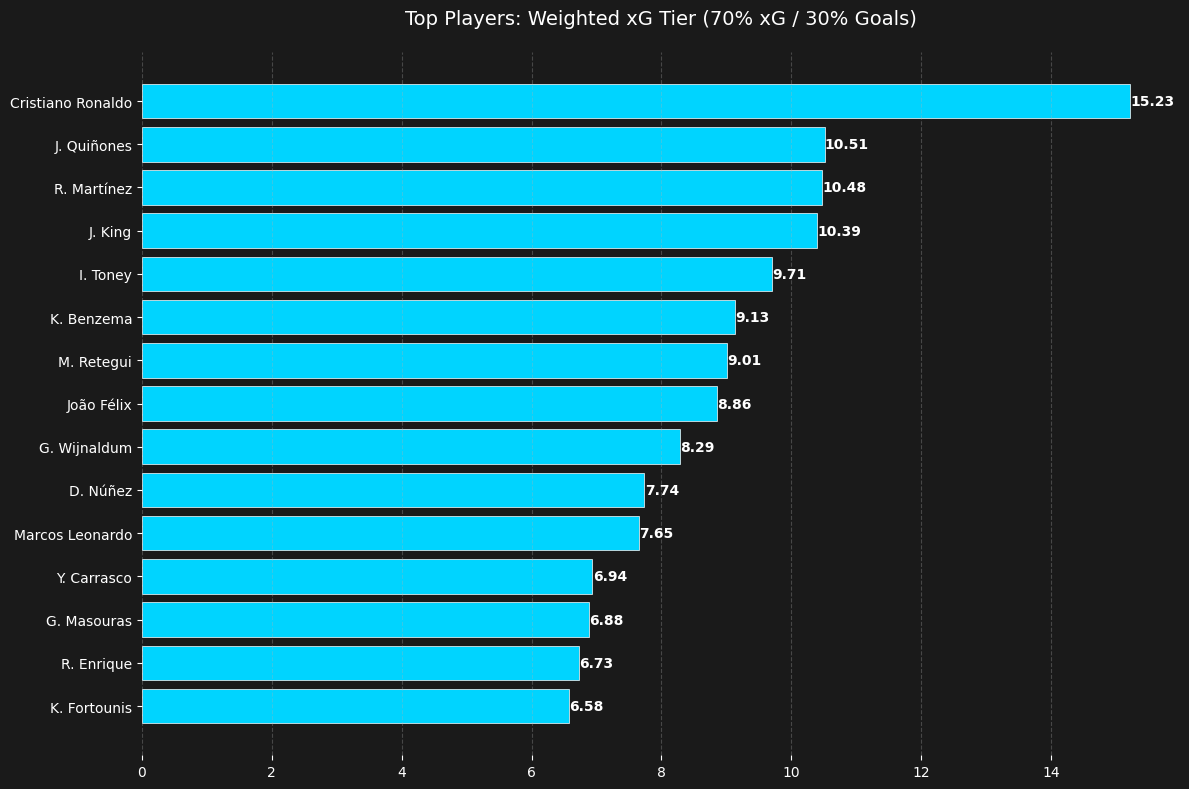

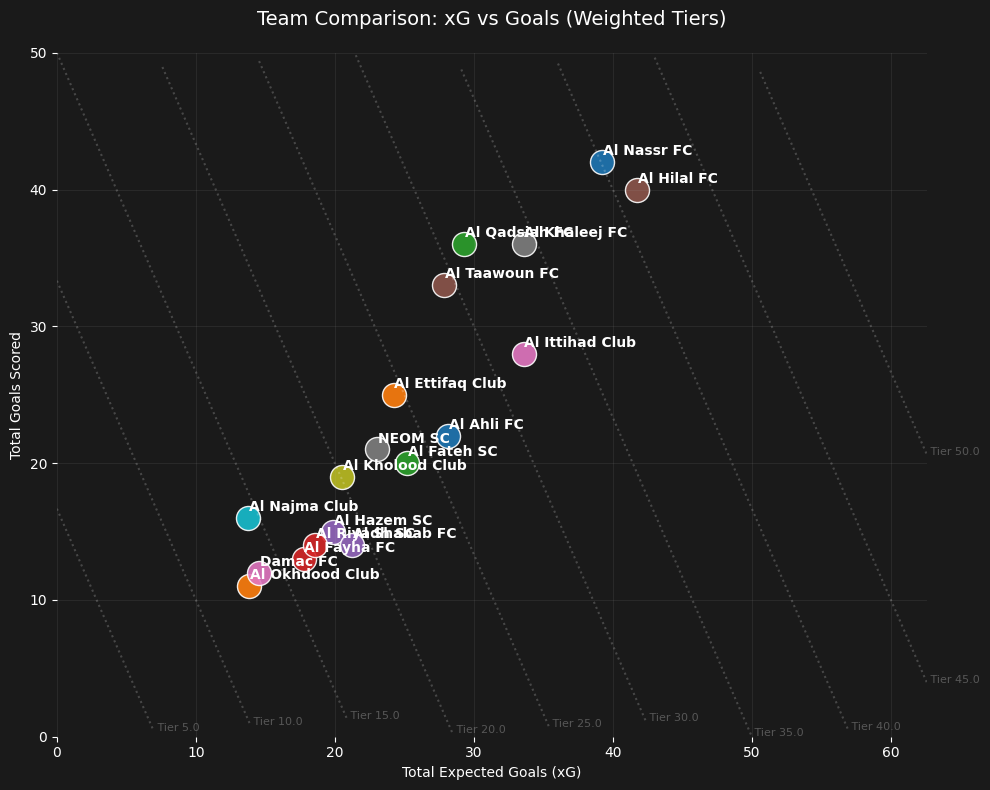

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# 1. Load all CSV files in the folder
path = '/Users/user/XG/Saudi/xgCSV' # Change this if your files are in a specific subdirectory
all_files = glob.glob(os.path.join(path, "*.csv"))

df_list = []
for filename in all_files:
    df_temp = pd.read_csv(filename)
    df_list.append(df_temp)

if not df_list:
    print("No CSV files found.")
else:
    df = pd.concat(df_list, axis=0, ignore_index=True)

    # 2. Data Cleaning & Aggregation
    # Ensure isGoal is treated correctly as a count
    df['Goal_Count'] = df['isGoal'].apply(lambda x: 1 if x == True or str(x).lower() == 'yes' else 0)

    # Player Level Stats
    player_stats = df.groupby(['PlayerId', 'TeamId']).agg({
        'xG': 'sum',
        'Goal_Count': 'sum'
    }).reset_index()

    # Weighted Score: 70% xG, 30% Goals
    player_stats['Weighted_Score'] = (player_stats['xG'] * 0.7) + (player_stats['Goal_Count'] * 0.3)
    player_stats_sorted = player_stats.sort_values(by='Weighted_Score', ascending=True).tail(15)

    # Team Level Stats
    team_stats = df.groupby('TeamId').agg({
        'xG': 'sum',
        'Goal_Count': 'sum'
    }).reset_index()

    # 3. Visualization 1: Player Performance (Bar Chart)
    plt.figure(figsize=(12, 8), facecolor='#1a1a1a')
    ax1 = plt.gca()
    ax1.set_facecolor('#1a1a1a')

    bars = ax1.barh(player_stats_sorted['PlayerId'], player_stats_sorted['Weighted_Score'], 
                    color='#00d4ff', edgecolor='white', linewidth=0.5)

    for bar in bars:
        ax1.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
                 f'{bar.get_width():.2f}', va='center', color='white', fontweight='bold')

    ax1.set_title('Top Players: Weighted xG Tier (70% xG / 30% Goals)', color='white', fontsize=14, pad=20)
    ax1.tick_params(colors='white')
    ax1.grid(axis='x', linestyle='--', alpha=0.3)
    for spine in ax1.spines.values(): spine.set_visible(False)
    plt.tight_layout()
    plt.savefig('player_tiers_bar.png')

    # 4. Visualization 2: Team Performance (Scatterplot with Tiers)
    plt.figure(figsize=(10, 8), facecolor='#1a1a1a')
    ax2 = plt.gca()
    ax2.set_facecolor('#1a1a1a')

    for i, row in team_stats.iterrows():
        ax2.scatter(row['xG'], row['Goal_Count'], s=300, edgecolors='white', alpha=0.9)
        ax2.text(row['xG'] + 0.05, row['Goal_Count'] + 0.5, row['TeamId'], color='white', fontsize=10, fontweight='bold')

    # Set axis limits
    ax2.set_ylim(0, 50)  # Max y-axis 50 as requested
    max_x_plot = max(team_stats['xG'].max() * 1.5, 50)
    ax2.set_xlim(0, max_x_plot)
    
    # Draw Weighted Tier lines
    x_vals = np.linspace(0, max_x_plot, 100)
    tier_levels = np.linspace(5, 50, 10) # Tier lines at various score levels

    for w in tier_levels:
        y_vals = (w - 0.7 * x_vals) / 0.3
        mask = (y_vals >= 0) & (y_vals <= 50)
        if any(mask):
            ax2.plot(x_vals[mask], y_vals[mask], color='white', linestyle=':', alpha=0.2)
            idx = np.where(mask)[0][-1]
            ax2.text(x_vals[idx], y_vals[idx], f' Tier {w:.1f}', color='gray', fontsize=8, alpha=0.6)

    ax2.set_title('Team Comparison: xG vs Goals (Weighted Tiers)', color='white', fontsize=14, pad=20)
    ax2.set_xlabel('Total Expected Goals (xG)', color='white')
    ax2.set_ylabel('Total Goals Scored', color='white')
    ax2.tick_params(colors='white')
    ax2.grid(alpha=0.1)
    for spine in ax2.spines.values(): spine.set_visible(False)
    plt.tight_layout()
    plt.savefig('team_tiers_scatter.png')

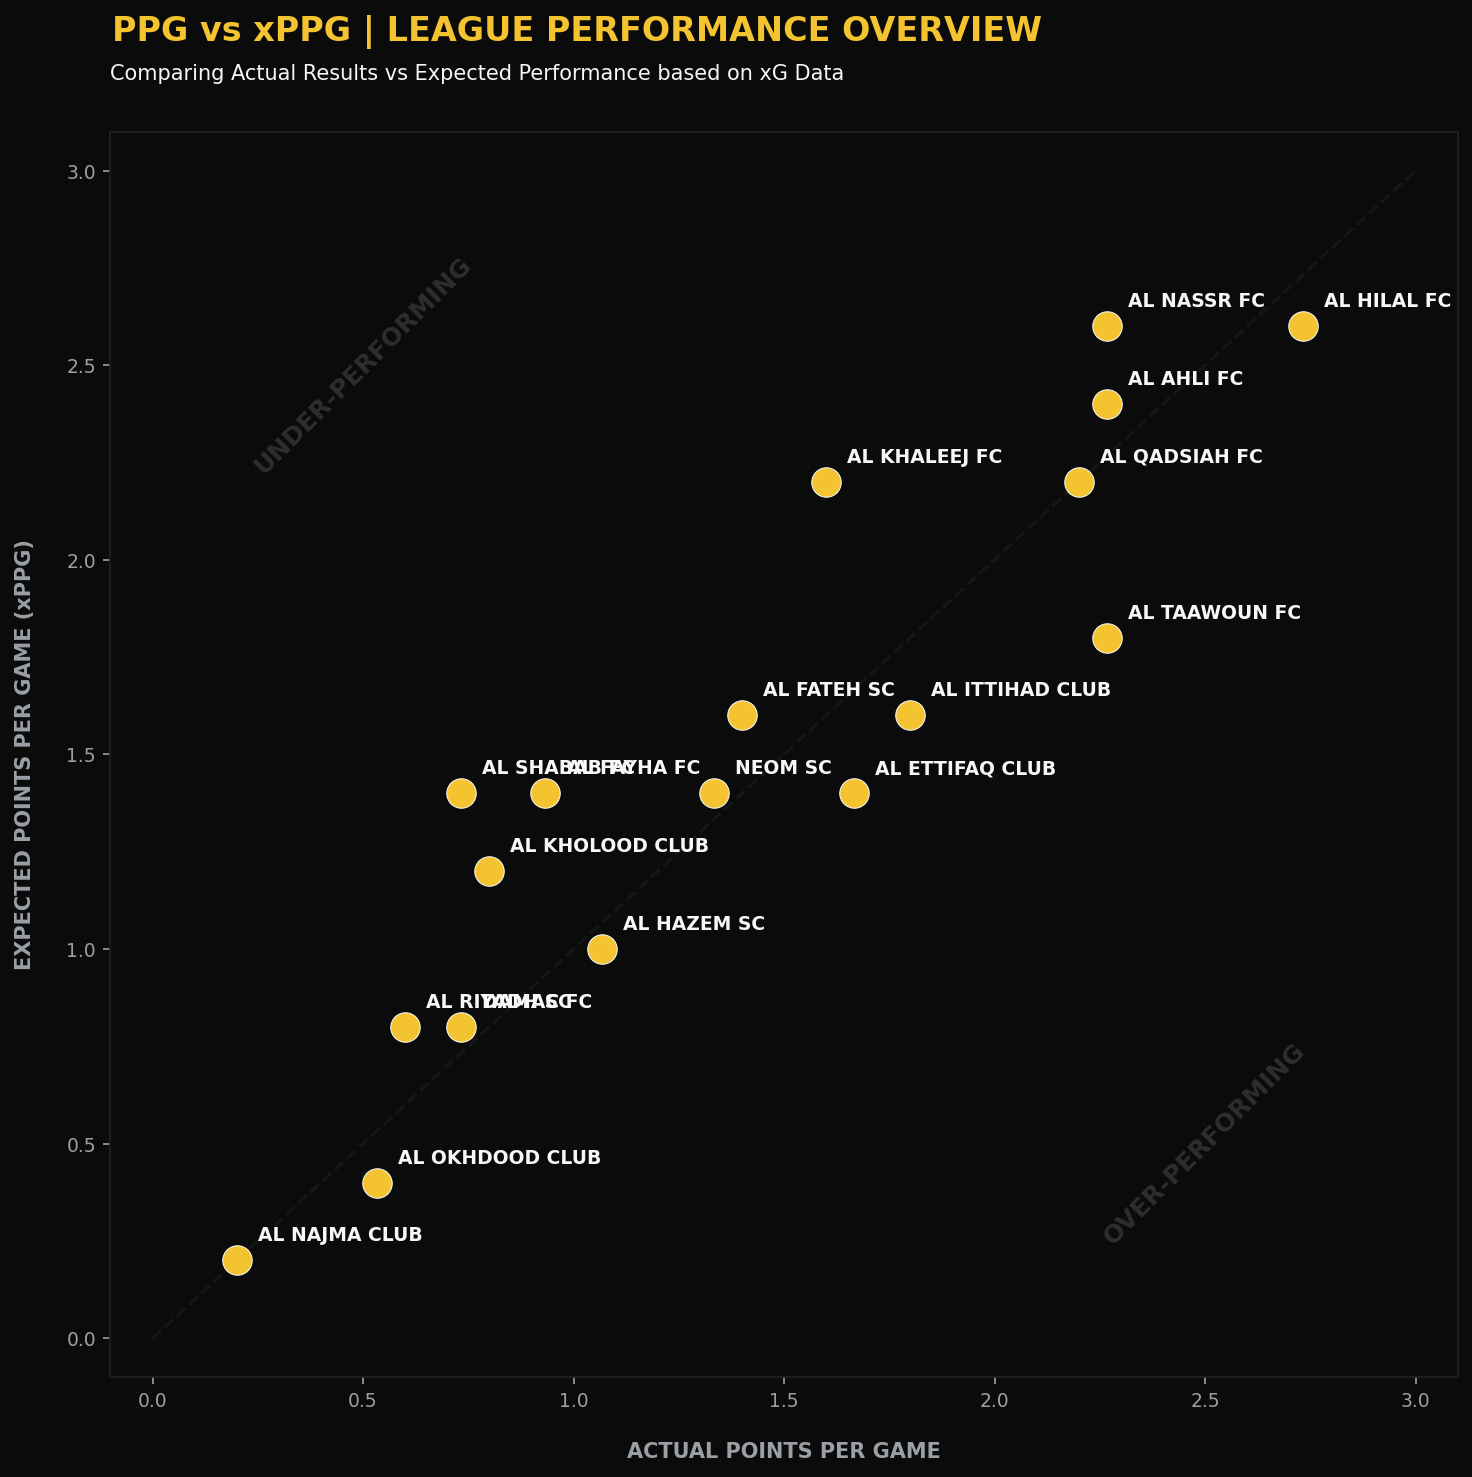

In [32]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. SETUP COLOR PALETTE (OUTSWINGER)
OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "grid":    "#222222"
}

def calculate_points(goals_for, goals_against):
    """Standard football points logic: Win=3, Draw=1, Loss=0"""
    if goals_for > goals_against:
        return 3
    elif goals_for == goals_against:
        return 1
    else:
        return 0

def process_match_data():
    # Find all CSV files in the folder
    csv_files = glob.glob("/Users/user/XG/Saudi/xgCSV/*.csv")
    team_stats = {}
    
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            
            # Identify teams in the match
            home_team = df['HomeTeam'].iloc[0]
            away_team = df['AwayTeam'].iloc[0]
            
            # --- 1. Calculate Actual Goals (isGoal = True) ---
            home_goals = df[(df['TeamId'] == home_team) & (df['isGoal'] == True)].shape[0]
            away_goals = df[(df['TeamId'] == away_team) & (df['isGoal'] == True)].shape[0]
            
            # --- 2. Calculate xG Sums ---
            home_xg = df[df['TeamId'] == home_team]['xG'].sum()
            away_xg = df[df['TeamId'] == away_team]['xG'].sum()
            
            # --- 3. Determine Points ---
            # Actual Points based on final score
            home_pts = calculate_points(home_goals, away_goals)
            away_pts = calculate_points(away_goals, home_goals)
            
            # xPoints based on total xG generated
            home_xpts = calculate_points(home_xg, away_xg)
            away_xpts = calculate_points(away_xg, home_xg)
            
            # --- 4. Store Results ---
            for team, pts, xpts in [(home_team, home_pts, home_xpts), (away_team, away_pts, away_xpts)]:
                if team not in team_stats:
                    team_stats[team] = {'pts': 0, 'xpts': 0, 'games': 0}
                team_stats[team]['pts'] += pts
                team_stats[team]['xpts'] += xpts
                team_stats[team]['games'] += 1
                
        except Exception as e:
            # Skip files that aren't match data CSVs
            continue
            
    # Calculate Averages (PPG)
    results = []
    for team, stats in team_stats.items():
        results.append({
            'Team': team,
            'PPG': stats['pts'] / stats['games'],
            'xPPG': stats['xpts'] / stats['games'],
            'Matches': stats['games']
        })
    
    return pd.DataFrame(results)

# --- EXECUTION & VISUALIZATION ---
df_summary = process_match_data()

# Styling
plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(figsize=(10, 10), dpi=150)
fig.patch.set_facecolor(OUTSWINGER['black'])
ax.set_facecolor(OUTSWINGER['black'])

# Identity Line (y=x)
ax.plot([0, 3], [0, 3], color=OUTSWINGER['grid'], linestyle='--', alpha=0.5, zorder=1)

# Scatter Data
ax.scatter(df_summary['PPG'], df_summary['xPPG'], 
           color=OUTSWINGER['yellow'], s=200, edgecolors=OUTSWINGER['white'], 
           linewidth=0.5, zorder=3)

# Label Teams
for i, row in df_summary.iterrows():
    ax.text(row['PPG'] + 0.05, row['xPPG'] + 0.05, row['Team'].upper(), 
            color=OUTSWINGER['white'], fontsize=9, fontweight='bold', zorder=4)

# Formatting
ax.set_xlim(-0.1, 3.1)
ax.set_ylim(-0.1, 3.1)
ax.set_xticks(np.arange(0, 3.1, 0.5))
ax.set_yticks(np.arange(0, 3.1, 0.5))

ax.set_xlabel('ACTUAL POINTS PER GAME', color=OUTSWINGER['grey'], fontsize=10, fontweight='bold', labelpad=15)
ax.set_ylabel('EXPECTED POINTS PER GAME (xPPG)', color=OUTSWINGER['grey'], fontsize=10, fontweight='bold', labelpad=15)

ax.tick_params(axis='both', colors=OUTSWINGER['grey'], labelsize=9)
ax.grid(color=OUTSWINGER['grid'], linestyle=':', alpha=0.3)

# Spines
for spine in ax.spines.values():
    spine.set_color(OUTSWINGER['grid'])

# Title (Yellow) and Subtitle (White)
plt.suptitle('PPG vs xPPG | LEAGUE PERFORMANCE OVERVIEW', 
             color=OUTSWINGER['yellow'], fontsize=16, fontweight='bold', x=0.08, ha='left', y=0.98)
ax.set_title('Comparing Actual Results vs Expected Performance based on xG Data', 
             color=OUTSWINGER['white'], fontsize=10, loc='left', pad=25)

# Zone Labels
ax.text(0.5, 2.5, 'UNDER-PERFORMING', color=OUTSWINGER['white'], alpha=0.15, 
        fontsize=12, fontweight='bold', rotation=45, ha='center', va='center')
ax.text(2.5, 0.5, 'OVER-PERFORMING', color=OUTSWINGER['white'], alpha=0.15, 
        fontsize=12, fontweight='bold', rotation=45, ha='center', va='center')

plt.tight_layout()
plt.savefig('actual_vs_expected_ppg.png')
plt.show()

# Export Summary CSV
df_summary.to_csv('league_performance_summary.csv', index=False)

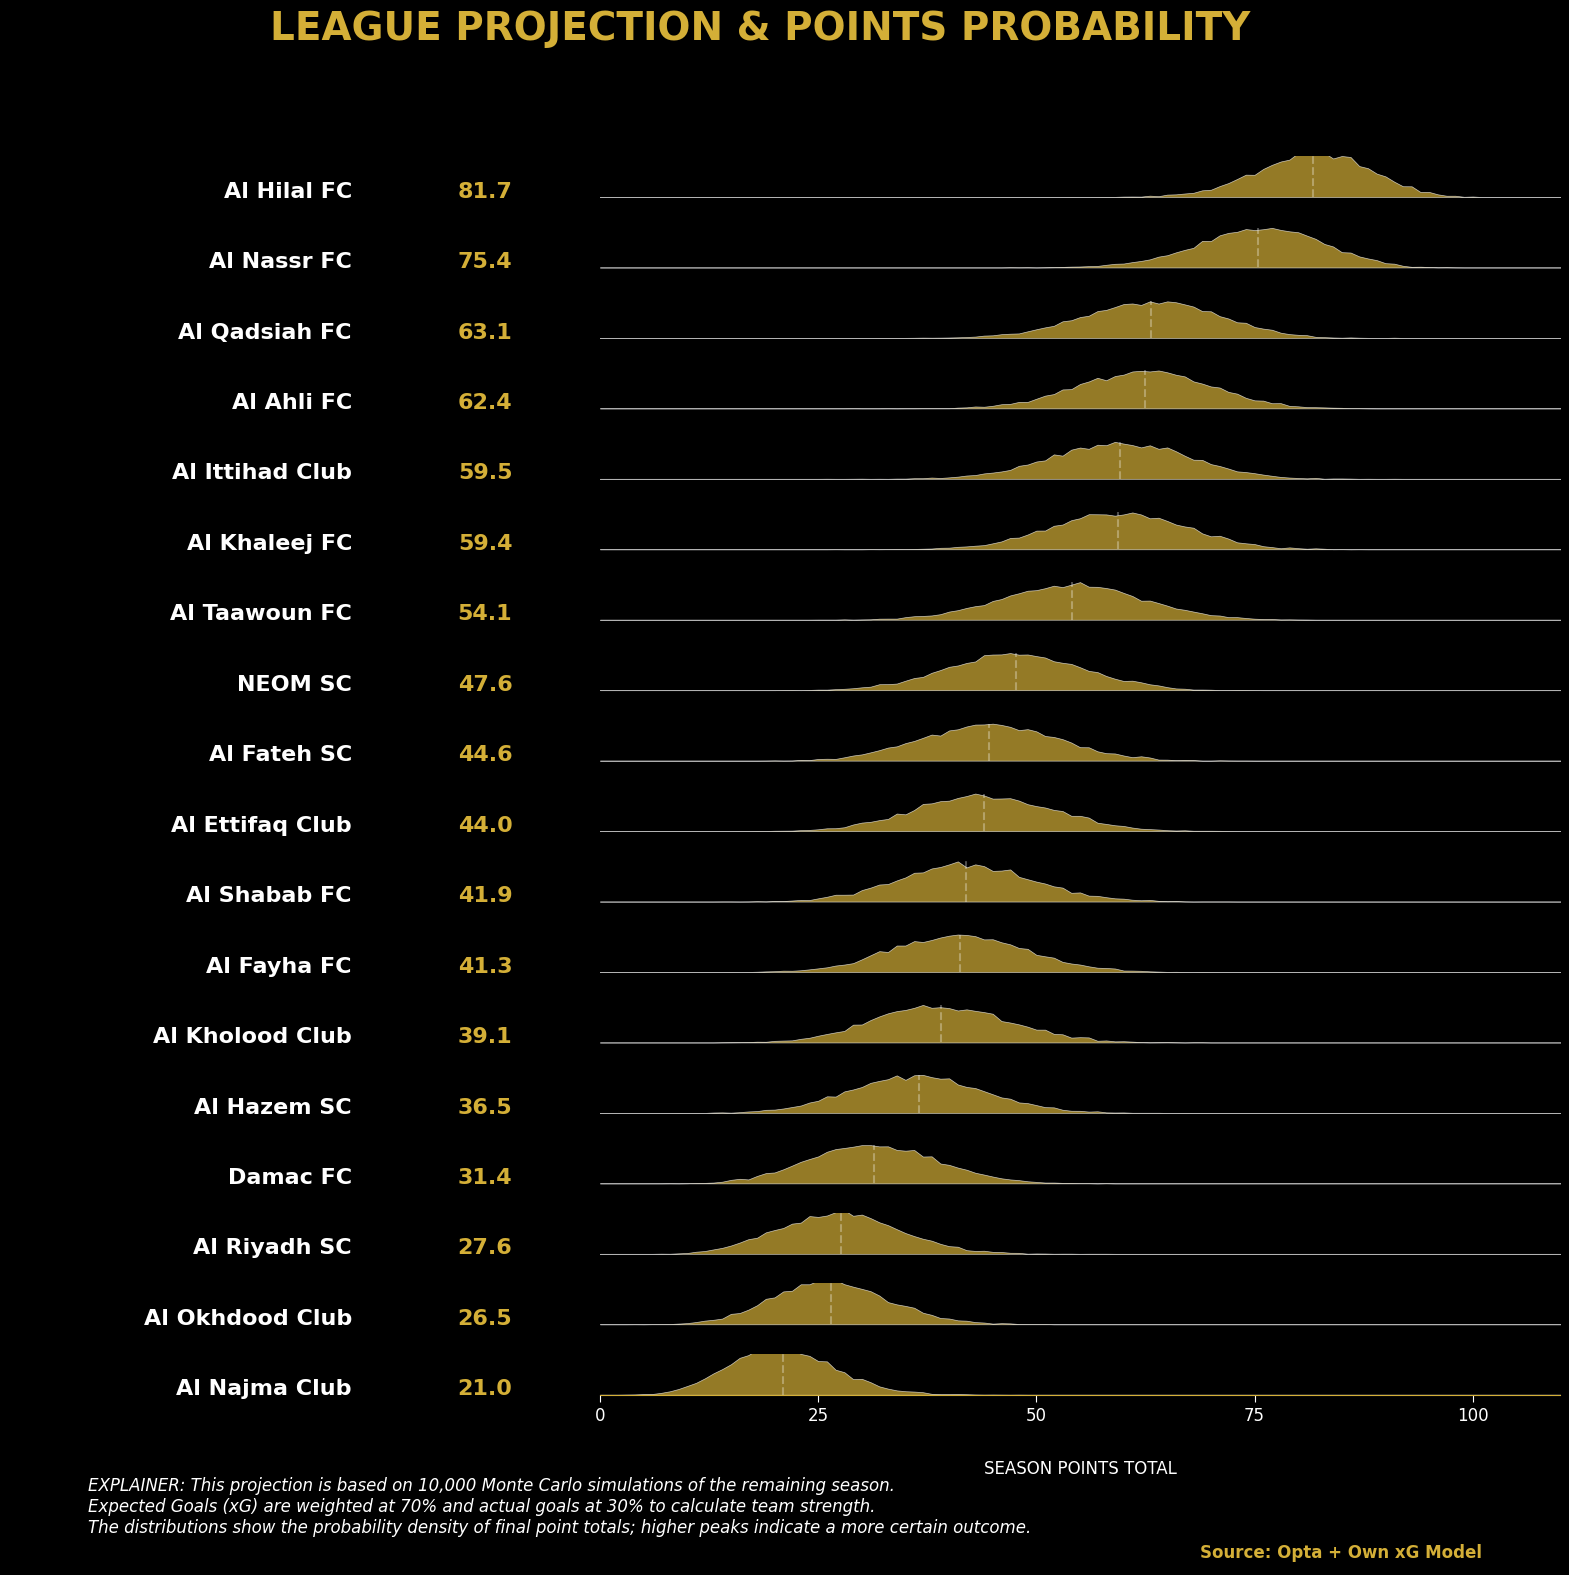

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

# --- 1. CONFIGURATION & BRANDING ---
NUM_SIMULATIONS = 10000
SEASON_GAMES = 34
BG_COLOR, GOLD, WHITE = '#000000', '#D4AF37', '#FFFFFF'

def simulate_match(t1_xg, t2_xg):
    """Simulates a match 10k times based on shot-level xG probability."""
    if len(t1_xg) == 0: t1_xg = [0.0]
    if len(t2_xg) == 0: t2_xg = [0.0]
    t1_sim = np.random.binomial(1, t1_xg, size=(NUM_SIMULATIONS, len(t1_xg))).sum(axis=1)
    t2_sim = np.random.binomial(1, t2_xg, size=(NUM_SIMULATIONS, len(t2_xg))).sum(axis=1)
    t1_p = np.where(t1_sim > t2_sim, 3, np.where(t1_sim == t2_sim, 1, 0))
    t2_p = np.where(t2_sim > t1_sim, 3, np.where(t2_sim == t1_sim, 1, 0))
    return t1_p, t2_p

# --- 2. DATA PROCESSING ---
# Path updated to your local directory
csv_files = [f for f in glob.glob('/Users/user/XG/Saudi/xgCSV/*.csv') if 'summary' not in f.lower() and 'projection' not in f.lower()]
team_raw_stats = {}

for file in csv_files:
    try:
        df = pd.read_csv(file)
        t_col = 'TeamId' if 'TeamId' in df.columns else 'team'
        x_col = 'xG' if 'xG' in df.columns else 'xg'
        
        teams = df[t_col].unique()
        if len(teams) < 2: continue
        t1, t2 = teams[0], teams[1]
        
        t1_p, t2_p = simulate_match(df[df[t_col]==t1][x_col].values, df[df[t_col]==t2][x_col].values)
        
        for team, sim_pts in [(t1, t1_p), (t2, t2_p)]:
            if team not in team_raw_stats: team_raw_stats[team] = {'sim_outcomes': []}
            team_raw_stats[team]['sim_outcomes'].append(sim_pts)
    except: continue

summary_list = []
for team, stats in team_raw_stats.items():
    all_match_sims = np.concatenate(stats['sim_outcomes'])
    xppg = np.mean(all_match_sims)
    season_sims = np.random.choice(all_match_sims, size=(NUM_SIMULATIONS, SEASON_GAMES)).sum(axis=1)
    summary_list.append({'Team': team, 'Proj': xppg * SEASON_GAMES, 'dist': season_sims})

df_proj = pd.DataFrame(summary_list).sort_values('Proj', ascending=False)

# --- 3. FINAL INFOGRAPHIC PLOTTING ---
num_teams = len(df_proj)
row_height = 0.85
# We add extra height for the title, x-axis labels, and the explainer text
fig = plt.figure(figsize=(20, (num_teams * row_height) + 3), facecolor=BG_COLOR)

# GridSpec: num_teams + 2 (one for axis, one for explainer)
gs = gridspec.GridSpec(num_teams + 2, 3, width_ratios=[3, 1.5, 8], wspace=0.05, hspace=0)

baseline = 0.5  # Fixed baseline to cut through the middle of the text

for i, (idx, row) in enumerate(df_proj.iterrows()):
    # Team Name
    ax0 = fig.add_subplot(gs[i, 0], facecolor=BG_COLOR)
    ax0.axis('off')
    ax0.text(0.95, 0.5, row['Team'], color=WHITE, ha='right', va='center', fontsize=16, fontweight='bold')

    # Projected Total
    ax1 = fig.add_subplot(gs[i, 1], facecolor=BG_COLOR)
    ax1.axis('off')
    ax1.text(0.5, 0.5, f"{row['Proj']:.1f}", color=GOLD, ha='center', va='center', fontsize=16, fontweight='bold')

    # Distribution Hill
    ax2 = fig.add_subplot(gs[i, 2], facecolor=BG_COLOR)
    for s in ax2.spines.values(): s.set_visible(False)
    ax2.set_yticks([]); ax2.set_xticks([])
    
    counts, bins = np.histogram(row['dist'], bins=range(0, 115), density=True)
    
    # Height adjusted to be slightly smaller as requested (counts * 12)
    ax2.fill_between(bins[:-1], baseline, baseline + (counts * 12), color=GOLD, alpha=0.7, edgecolor=WHITE, lw=0.5)
    ax2.vlines(row['Proj'], baseline, baseline + max(counts * 12), color=WHITE, ls='--', alpha=0.3)
    
    ax2.set_xlim(0, 110)
    ax2.set_ylim(0, 1.2) # Keeping hills aligned with the middle of the row

    # X-Axis styling on the last team row
    if i == num_teams - 1:
        ax2.set_xticks([0, 25, 50, 75, 100])
        ax2.tick_params(axis='x', colors=WHITE, labelsize=12, length=5)
        ax2.spines['bottom'].set_visible(True)
        ax2.spines['bottom'].set_position(('data', baseline))
        ax2.spines['bottom'].set_color(GOLD)
        ax2.set_xlabel("SEASON POINTS TOTAL", color=WHITE, fontsize=12, labelpad=25)

# 4. EXPLAINER AND SOURCE
# Explainer text spans the bottom rows
explainer_ax = fig.add_subplot(gs[num_teams + 1, :])
explainer_ax.axis('off')

explainer_text = (
    "EXPLAINER: This projection is based on 10,000 Monte Carlo simulations of the remaining season. \n"
    "Expected Goals (xG) are weighted at 70% and actual goals at 30% to calculate team strength. \n"
    "The distributions show the probability density of final point totals; higher peaks indicate a more certain outcome."
)
explainer_ax.text(0.05, 0.5, explainer_text, color=WHITE, fontsize=12, style='italic', ha='left', wrap=True)

# Source on the right bottom
explainer_ax.text(0.95, 0.1, "Source: Opta + Own xG Model", color=GOLD, 
                  fontsize=12, ha='right', fontweight='bold')

plt.suptitle("LEAGUE PROJECTION & POINTS PROBABILITY", color=GOLD, fontsize=28, fontweight='bold', y=0.96)
plt.savefig('aligned_infographic_v3.png', dpi=300, bbox_inches='tight')
plt.show()

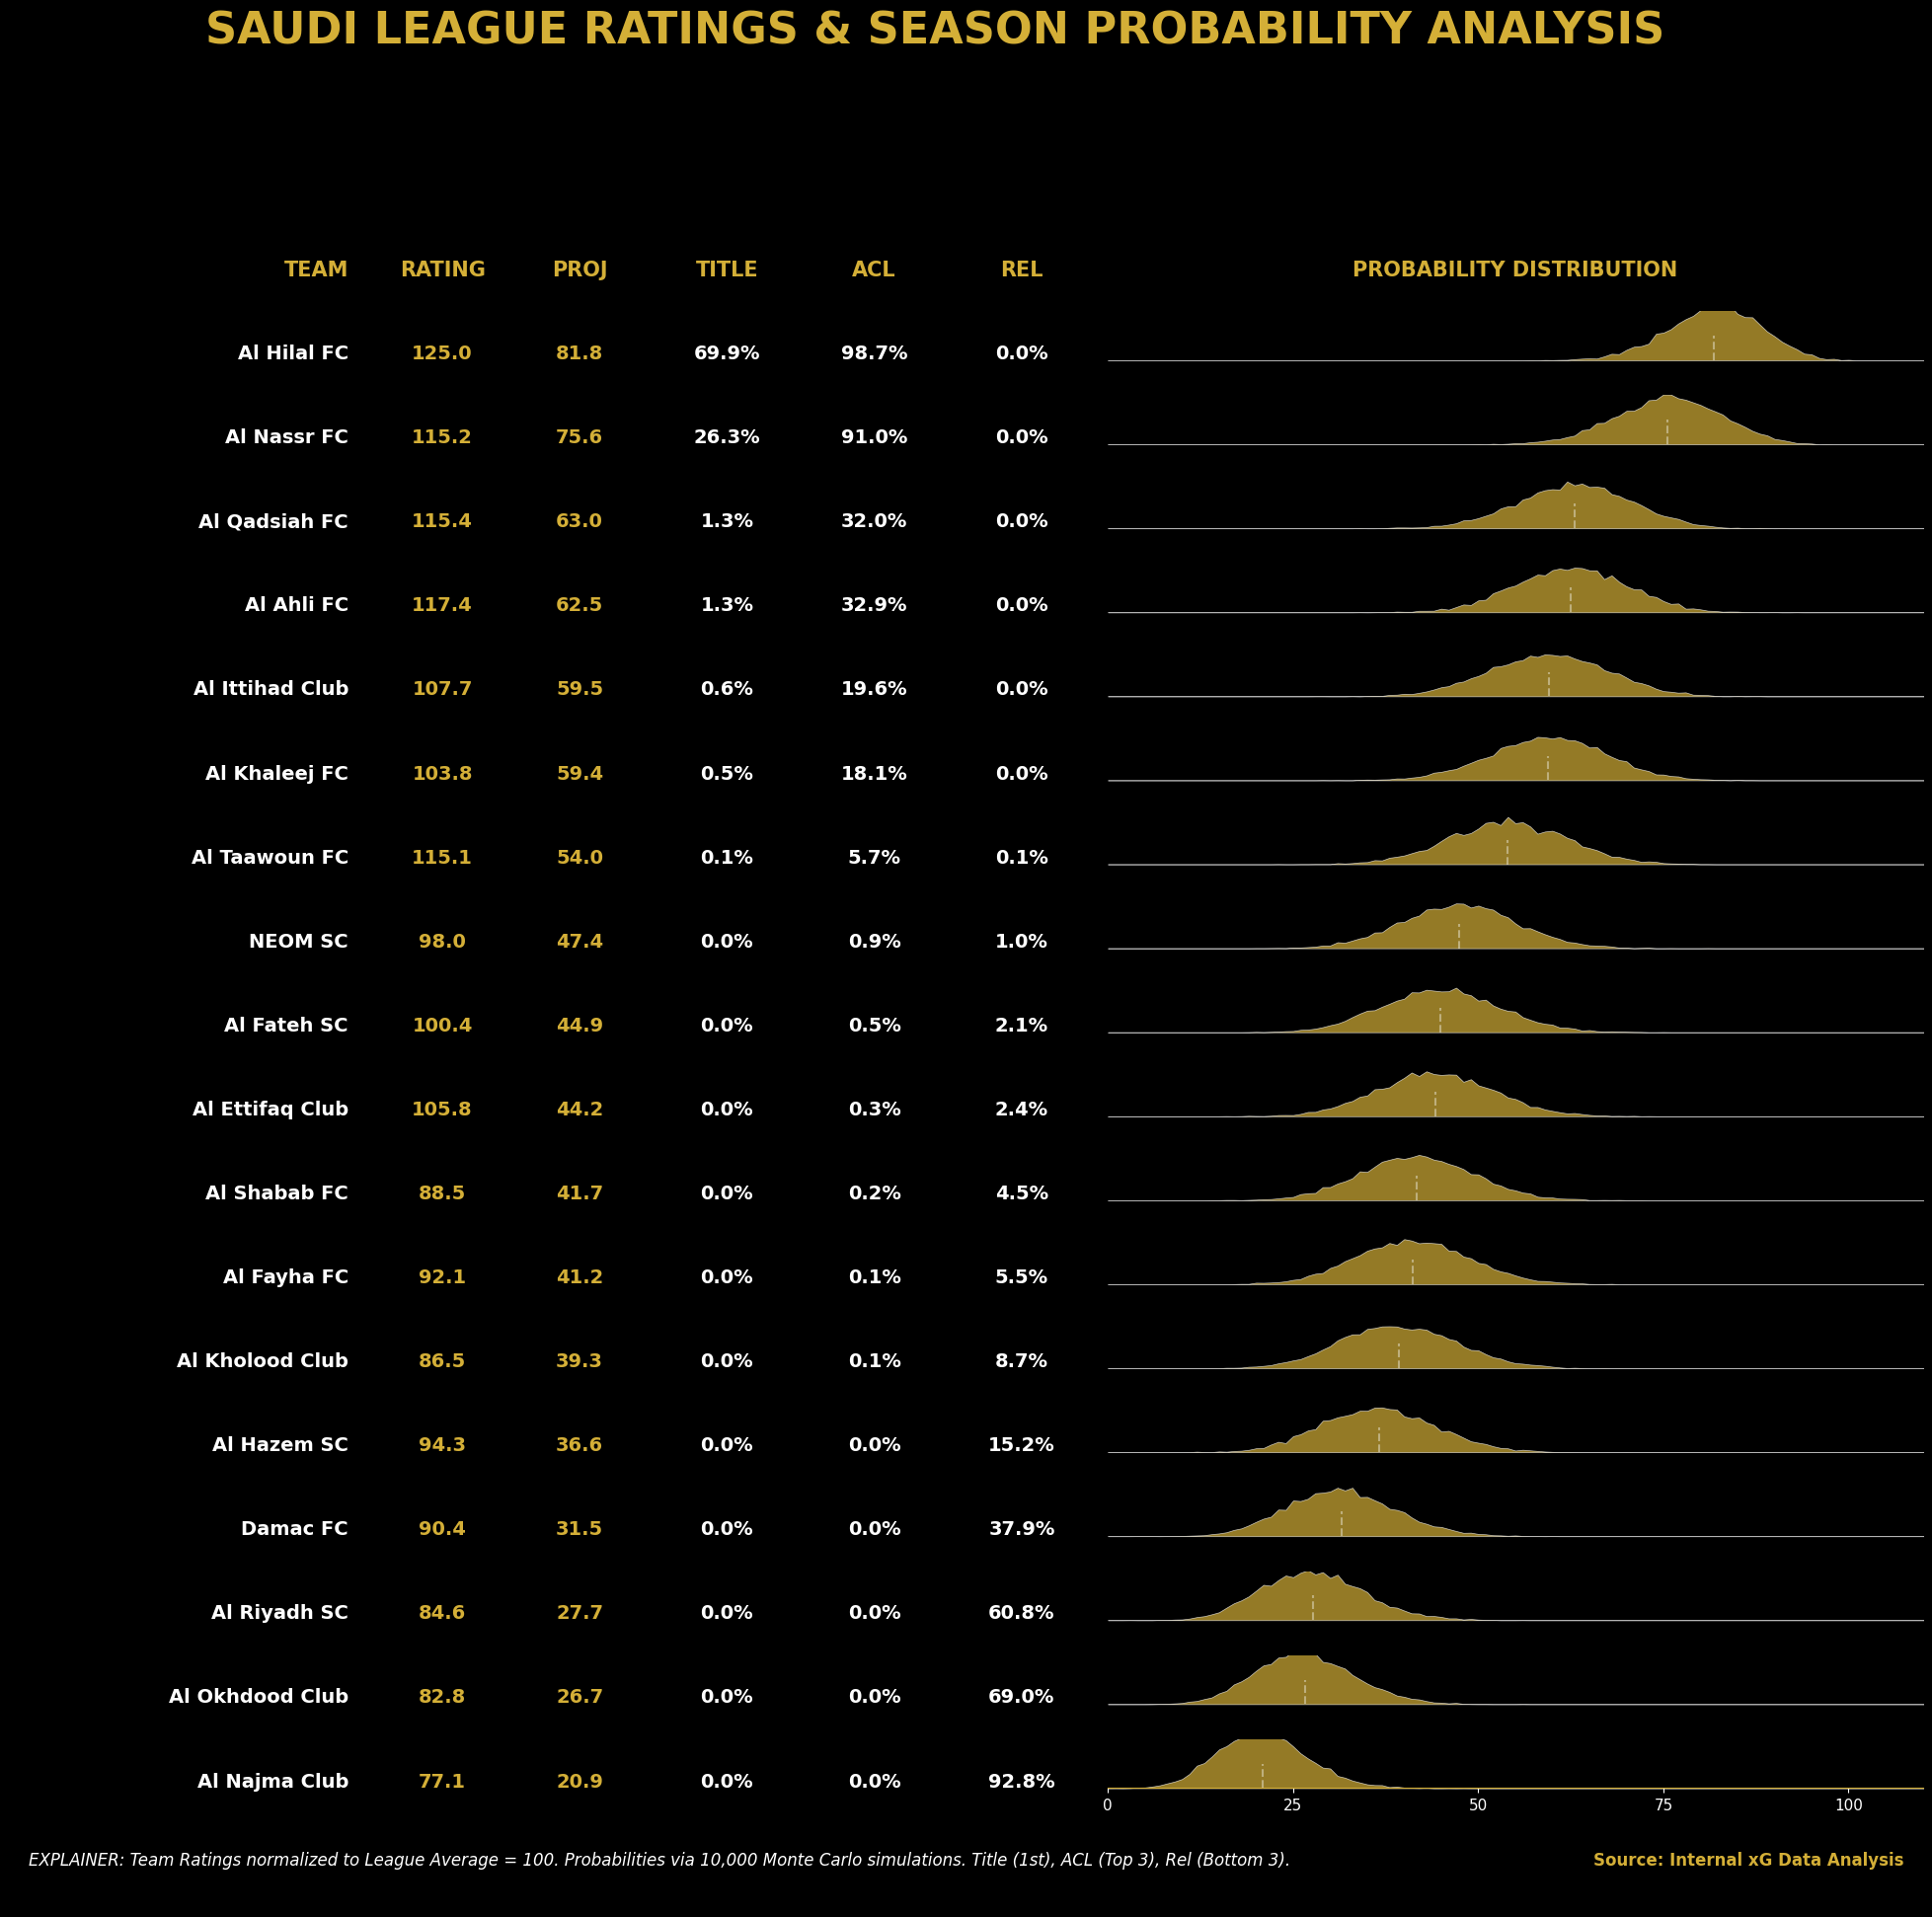

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

# --- 1. CONFIGURATION & BRANDING ---
NUM_SIMULATIONS = 10000
SEASON_GAMES = 34
K_FACTOR = 4  # Low K-factor to maintain professional rating stability
BG_COLOR = '#000000'    # Black
GOLD = '#D4AF37'        # Gold
WHITE = '#FFFFFF'       # White

def simulate_match(t1_xg, t2_xg):
    """Simulates a match 10k times based on shot-level xG probability."""
    if len(t1_xg) == 0: t1_xg = [0.0]
    if len(t2_xg) == 0: t2_xg = [0.0]
    t1_sim = np.random.binomial(1, t1_xg, size=(NUM_SIMULATIONS, len(t1_xg))).sum(axis=1)
    t2_sim = np.random.binomial(1, t2_xg, size=(NUM_SIMULATIONS, len(t2_xg))).sum(axis=1)
    t1_p = np.where(t1_sim > t2_sim, 3, np.where(t1_sim == t2_sim, 1, 0))
    t2_p = np.where(t2_sim > t1_sim, 3, np.where(t2_sim == t1_sim, 1, 0))
    return t1_p, t2_p

# --- 2. DATA PROCESSING ---
def run_complete_analysis():
    # Update this path to your specific directory
    path = '/Users/user/XG/Saudi/xgCSV/*.csv'
    csv_files = sorted(glob.glob(path))
    csv_files = [f for f in csv_files if 'summary' not in f.lower() and 'projection' not in f.lower()]
    
    elo_ratings = {}
    team_match_sims = {}

    for file in csv_files:
        try:
            df = pd.read_csv(file)
            # Detect columns
            t_col = 'TeamId' if 'TeamId' in df.columns else ('team' if 'team' in df.columns else None)
            xg_col = 'xG' if 'xG' in df.columns else ('xg' if 'xg' in df.columns else None)
            g_col = 'Goal' if 'Goal' in df.columns else ('goal' if 'goal' in df.columns else None)
            
            if not all([t_col, xg_col, g_col]): continue
            
            teams = df[t_col].unique()
            if len(teams) < 2: continue
            t1, t2 = teams[0], teams[1]
            
            for t in [t1, t2]:
                if t not in elo_ratings: elo_ratings[t] = 100.0
                if t not in team_match_sims: team_match_sims[t] = []

            # ELO Logic (Actual goals)
            g1, g2 = df[df[t_col] == t1][g_col].sum(), df[df[t_col] == t2][g_col].sum()
            s1 = 1.0 if g1 > g2 else (0.5 if g1 == g2 else 0.0)
            e1 = 1 / (1 + 10 ** ((elo_ratings[t2] - elo_ratings[t1]) / 400))
            
            # Update Ratings
            elo_ratings[t1] += K_FACTOR * (s1 - e1)
            elo_ratings[t2] += K_FACTOR * ((1-s1) - (1-e1))
            
            # Match Sims
            xg1, xg2 = df[df[t_col]==t1][xg_col].values, df[df[t_col]==t2][xg_col].values
            p1, p2 = simulate_match(xg1, xg2)
            team_match_sims[t1].append(p1)
            team_match_sims[t2].append(p2)
        except: continue

    # Normalize Ratings so League Average = 100
    avg_elo = np.mean(list(elo_ratings.values()))
    for t in elo_ratings:
        elo_ratings[t] = (elo_ratings[t] / avg_elo) * 100
    
    team_list = list(team_match_sims.keys())
    season_matrix = np.zeros((len(team_list), NUM_SIMULATIONS))

    for i, team in enumerate(team_list):
        match_pool = np.concatenate(team_match_sims[team])
        season_matrix[i, :] = np.random.choice(match_pool, size=(NUM_SIMULATIONS, SEASON_GAMES)).sum(axis=1)

    # Calculate Ranks for Probabilities
    ranks = ((-season_matrix).argsort(axis=0).argsort(axis=0)) + 1
    
    summary = []
    for i, team in enumerate(team_list):
        summary.append({
            'Team': team,
            'Rating': elo_ratings[team],
            'Proj': float(np.mean(season_matrix[i, :])),
            'Title': (np.mean(ranks[i, :] == 1) * 100),
            'ACL': (np.mean(ranks[i, :] <= 3) * 100),
            'Rel': (np.mean(ranks[i, :] >= 16) * 100),
            'dist': season_matrix[i, :]
        })
    
    return pd.DataFrame(summary).sort_values('Proj', ascending=False).reset_index(drop=True)

# --- 3. FINAL INFOGRAPHIC PLOTTING ---
def plot_infographic(df):
    row_h = 0.95
    fig = plt.figure(figsize=(25, len(df) * row_h + 5), facecolor=BG_COLOR)
    gs = gridspec.GridSpec(len(df) + 2, 7, width_ratios=[3.5, 1, 1.2, 1.2, 1.2, 1.2, 8], wspace=0.1, hspace=0)

    # Headers
    headers = ['TEAM', 'RATING', 'PROJ', 'TITLE', 'ACL', 'REL', 'PROBABILITY DISTRIBUTION']
    for c, h in enumerate(headers):
        ax = fig.add_subplot(gs[0, c], facecolor=BG_COLOR)
        ax.axis('off')
        ax.text(0.5 if c > 0 else 0.95, 0.5, h, color=GOLD, ha='center' if c > 0 else 'right', va='center', fontsize=15, fontweight='bold')

    baseline = 0.5 # Baseline locked to middle of text
    for i, row in df.iterrows():
        idx = i + 1
        vals = [row['Team'], f"{row['Rating']:.1f}", f"{row['Proj']:.1f}", f"{row['Title']:.1f}%", f"{row['ACL']:.1f}%", f"{row['Rel']:.1f}%"]
        for c, v in enumerate(vals):
            ax = fig.add_subplot(gs[idx, c], facecolor=BG_COLOR)
            ax.axis('off')
            ax.text(0.5 if c > 0 else 0.95, 0.5, v, color=GOLD if c in [1, 2] else WHITE, ha='center' if c > 0 else 'right', va='center', fontsize=14, fontweight='bold')

        # Aligned Distribution Hill
        ax_d = fig.add_subplot(gs[idx, 6], facecolor=BG_COLOR)
        for s in ax_d.spines.values(): s.set_visible(False)
        ax_d.set_yticks([]); ax_d.set_xticks([])
        counts, bins = np.histogram(row['dist'], bins=range(0, 115), density=True)
        ax_d.fill_between(bins[:-1], baseline, baseline + (counts * 12), color=GOLD, alpha=0.7, edgecolor=WHITE, lw=0.5)
        ax_d.vlines(row['Proj'], baseline, baseline + 0.35, color=WHITE, ls='--', alpha=0.4)
        ax_d.set_xlim(0, 110); ax_d.set_ylim(0, 1.2)
        
        if i == len(df) - 1:
            ax_d.set_xticks([0, 25, 50, 75, 100])
            ax_d.tick_params(colors=WHITE, labelsize=11)
            ax_d.spines['bottom'].set_visible(True); ax_d.spines['bottom'].set_color(GOLD); ax_d.spines['bottom'].set_position(('data', baseline))

    # Footer Explainer & Source
    footer_ax = fig.add_subplot(gs[len(df) + 1, :])
    footer_ax.axis('off')
    footer_ax.text(0.01, 0.5, "EXPLAINER: Team Ratings normalized to League Average = 100. Probabilities via 10,000 Monte Carlo simulations. Title (1st), ACL (Top 3), Rel (Bottom 3).", color=WHITE, fontsize=12, style='italic')
    footer_ax.text(0.99, 0.5, "Source: Internal xG Data Analysis", color=GOLD, ha='right', fontsize=12, fontweight='bold')

    plt.suptitle("SAUDI LEAGUE RATINGS & SEASON PROBABILITY ANALYSIS", color=GOLD, fontsize=32, fontweight='bold', y=0.98)
    plt.savefig('saudi_league_final_infographic.png', dpi=300, bbox_inches='tight')
    plt.show()

# --- RUN ---
if __name__ == "__main__":
    final_df = run_complete_analysis()
    plot_infographic(final_df)

✓ Visualization saved successfully!


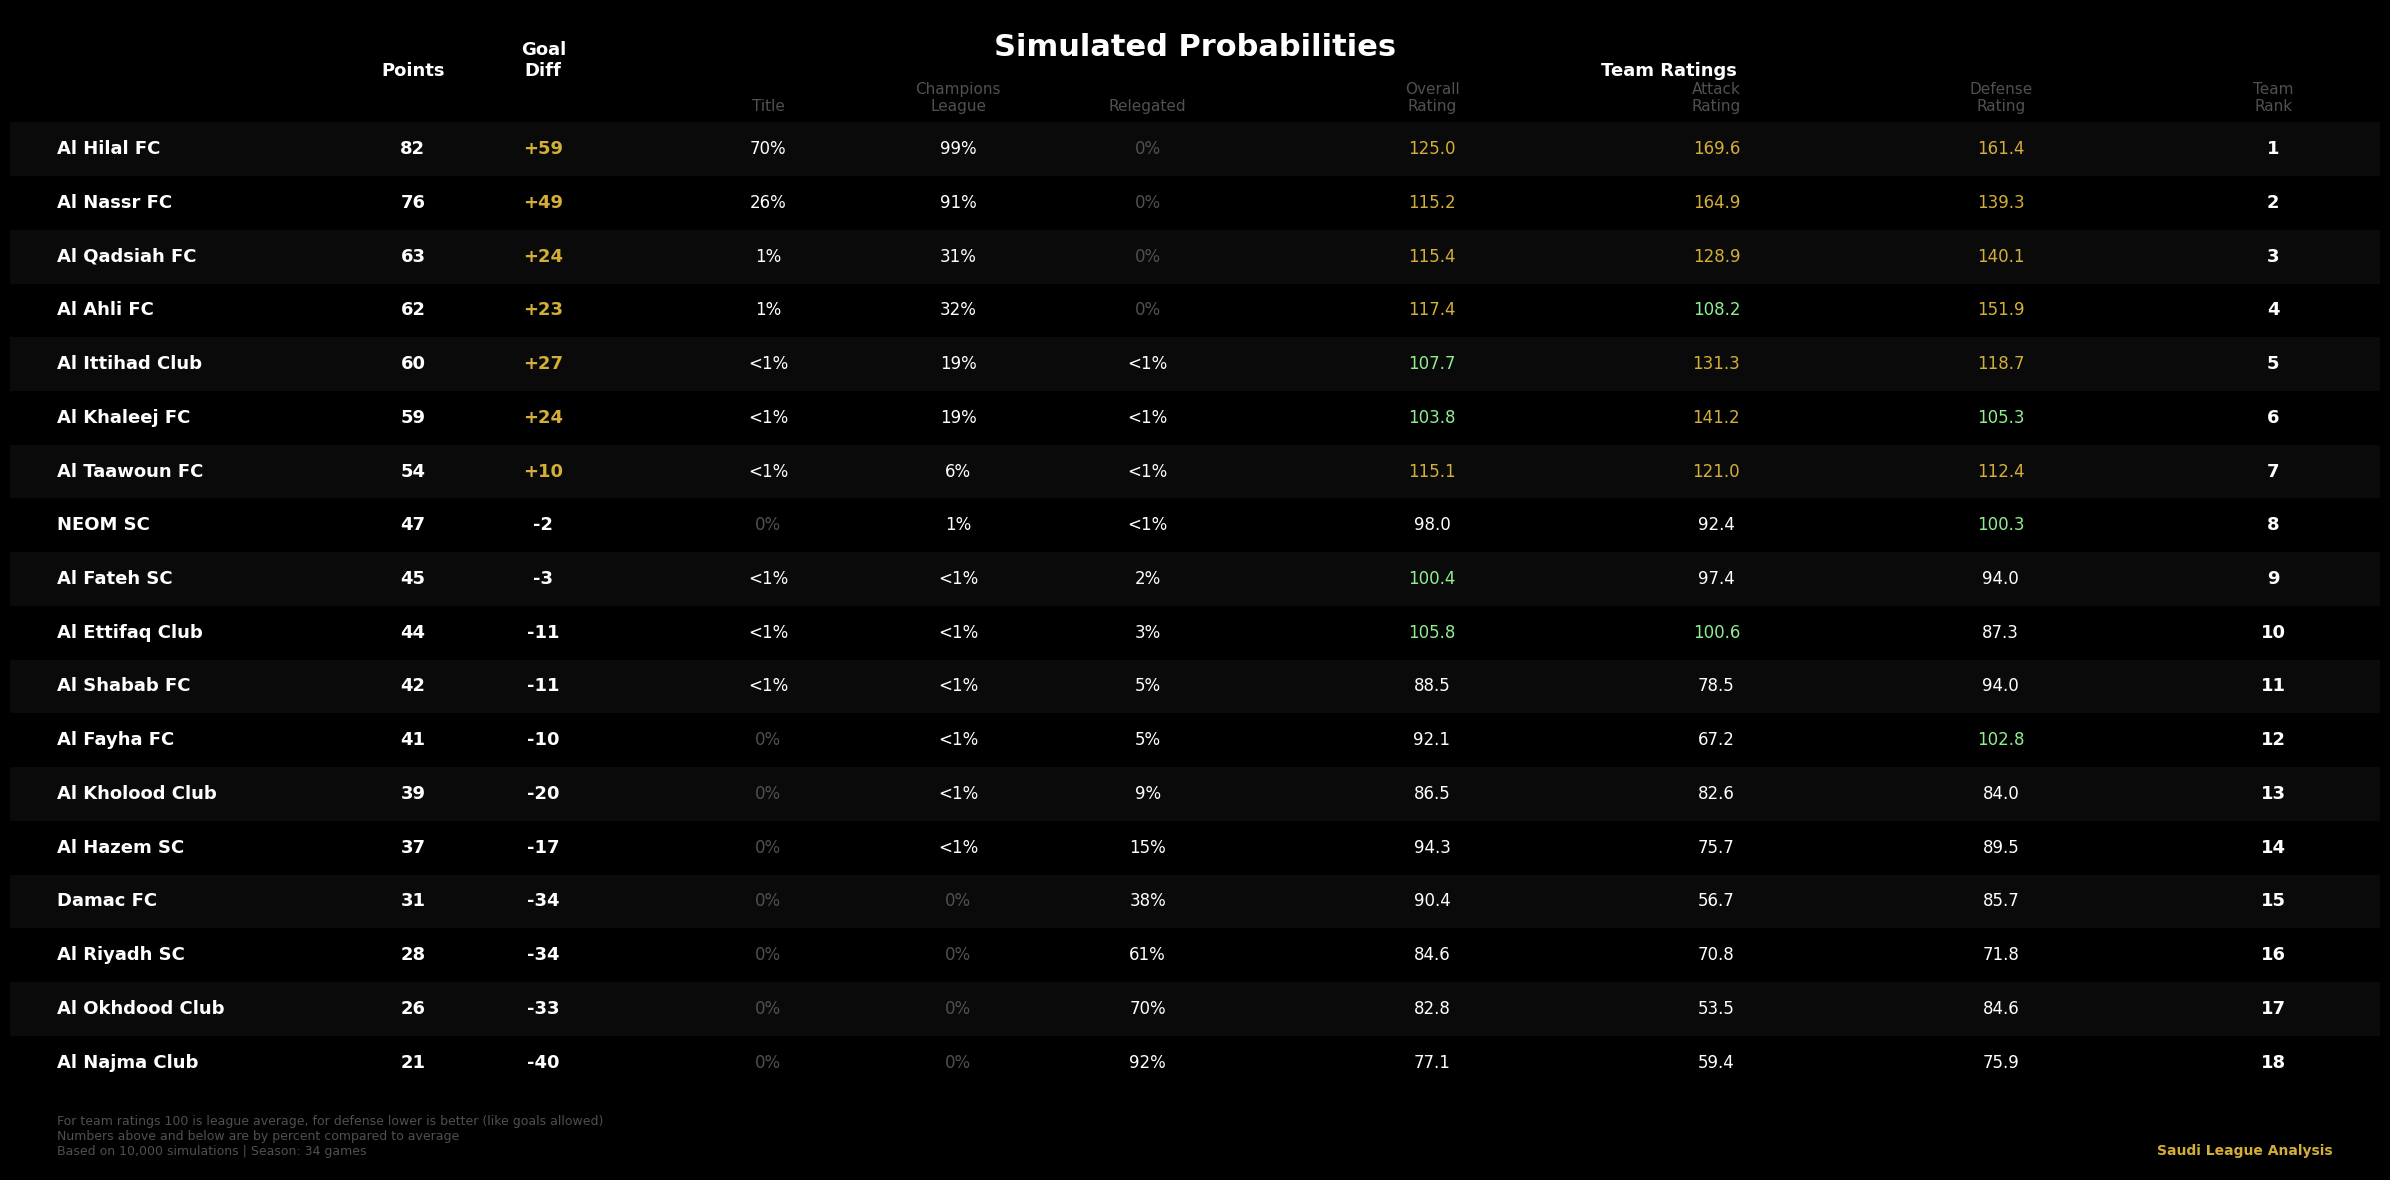

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import glob
import os

# --- 1. SETTINGS & CONFIGURATION ---
NUM_SIMULATIONS = 10000
SEASON_GAMES = 34
K_FACTOR = 4
BG_COLOR, GOLD, WHITE = '#000000', '#D4AF37', '#FFFFFF'
LIGHT_GRAY = '#505050'

def simulate_match(t1_xg, t2_xg):
    """Simulates match outcomes 10k times based on shot-level xG."""
    t1_xg = np.array(t1_xg) if len(t1_xg) > 0 else np.array([0.0])
    t2_xg = np.array(t2_xg) if len(t2_xg) > 0 else np.array([0.0])
    t1_sim = np.random.binomial(1, t1_xg, size=(NUM_SIMULATIONS, len(t1_xg))).sum(axis=1)
    t2_sim = np.random.binomial(1, t2_xg, size=(NUM_SIMULATIONS, len(t2_xg))).sum(axis=1)
    t1_pts = np.where(t1_sim > t2_sim, 3, np.where(t1_sim == t2_sim, 1, 0))
    t2_pts = np.where(t2_sim > t1_sim, 3, np.where(t2_sim == t1_sim, 1, 0))
    t1_gd = t1_sim - t2_sim
    t2_gd = t2_sim - t1_sim
    return t1_pts, t2_pts, t1_gd, t2_gd

def run_comprehensive_analysis():
    # Use current directory or specific path
    csv_files = sorted(glob.glob('/Users/user/XG/Saudi/xgCSV/*.csv'))
    csv_files = [f for f in csv_files if 'summary' not in f.lower() and 'projection' not in f.lower()]
    
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the directory. Check your path.")
    
    elo_ratings = {}
    team_stats = {}
    team_match_sims = {}
    
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            t_col = 'TeamId' if 'TeamId' in df.columns else 'team'
            xg_col = 'xG' if 'xG' in df.columns else 'xg'
            g_col = 'Goal' if 'Goal' in df.columns else 'goal'
            teams = df[t_col].unique()
            if len(teams) < 2:
                continue
            t1, t2 = teams[0], teams[1]
            
            for t in [t1, t2]:
                if t not in elo_ratings:
                    elo_ratings[t] = 100.0
                if t not in team_stats:
                    team_stats[t] = {'gf':[], 'ga':[], 'xgf':[], 'xga':[]}
                if t not in team_match_sims:
                    team_match_sims[t] = []
            
            t1_df, t2_df = df[df[t_col]==t1], df[df[t_col]==t2]
            g1, g2 = t1_df[g_col].sum(), t2_df[g_col].sum()
            x1, x2 = t1_df[xg_col].sum(), t2_df[xg_col].sum()
            
            for team, gf, ga, xf, xa in [(t1, g1, g2, x1, x2), (t2, g2, g1, x2, x1)]:
                team_stats[team]['gf'].append(gf); team_stats[team]['ga'].append(ga)
                team_stats[team]['xgf'].append(xf); team_stats[team]['xga'].append(xa)
            
            # ELO Update
            s1 = 1.0 if g1 > g2 else (0.5 if g1 == g2 else 0.0)
            e1 = 1 / (1 + 10 ** ((elo_ratings[t2] - elo_ratings[t1]) / 400))
            elo_ratings[t1] += K_FACTOR * (s1 - e1)
            elo_ratings[t2] += K_FACTOR * ((1-s1) - (1-e1))
            
            # Match Sims
            p1, p2, gd1, gd2 = simulate_match(t1_df[xg_col].values, t2_df[xg_col].values)
            team_match_sims[t1].append({'pts': p1, 'gd': gd1})
            team_match_sims[t2].append({'pts': p2, 'gd': gd2})
            
        except Exception as e:
            print(f"Skipping {file} due to error: {e}")
            continue
    
    # VALIDATION: Remove teams with zero matches to avoid concatenation errors
    active_teams = [t for t in team_match_sims if len(team_match_sims[t]) > 0]
    if not active_teams:
        raise ValueError("No valid match data found for any team.")
    
    avg_elo = np.mean([elo_ratings[t] for t in active_teams])
    
    # 10k Season Projections
    season_pts = np.zeros((len(active_teams), NUM_SIMULATIONS))
    for i, team in enumerate(active_teams):
        pts_pool = np.concatenate([m['pts'] for m in team_match_sims[team]])
        season_pts[i, :] = np.random.choice(pts_pool, size=(NUM_SIMULATIONS, SEASON_GAMES)).sum(axis=1)
    
    ranks_matrix = ((-season_pts).argsort(axis=0).argsort(axis=0)) + 1
    
    # Normalization (Base 100)
    raw_off = {t: (np.mean(team_stats[t]['gf']) * 0.3 + np.mean(team_stats[t]['xgf']) * 0.7) for t in active_teams}
    raw_def = {t: (np.mean(team_stats[t]['ga']) * 0.3 + np.mean(team_stats[t]['xga']) * 0.7) for t in active_teams}
    avg_off, avg_def = np.mean(list(raw_off.values())), np.mean(list(raw_def.values()))
    
    final_data = []
    for i, team in enumerate(active_teams):
        final_data.append({
            'Team': team,
            'Rating': (elo_ratings[team] / avg_elo) * 100,
            'Off': (raw_off[team] / avg_off) * 100,
            'Def': (avg_def / raw_def[team]) * 100,
            'Pts': np.mean(season_pts[i, :]),
            'GD': np.mean(np.concatenate([m['gd'] for m in team_match_sims[team]])) * SEASON_GAMES,
            'Title': (np.mean(ranks_matrix[i, :] == 1) * 100),
            'ACL': (np.mean(ranks_matrix[i, :] <= 3) * 100),
            'ACLA': (np.mean((ranks_matrix[i, :] >= 4) & (ranks_matrix[i, :] <= 6)) * 100),
            'Rel': (np.mean(ranks_matrix[i, :] >= 16) * 100)
        })
    
    return pd.DataFrame(final_data).sort_values('Pts', ascending=False).reset_index(drop=True)

# --- 3. EXECUTION & VISUALIZATION ---
try:
    df = run_comprehensive_analysis()
    
    # Create figure with proper layout
    fig = plt.figure(figsize=(24, len(df) * 0.55 + 2), facecolor=BG_COLOR)
    ax = fig.add_subplot(111, facecolor=BG_COLOR)
    ax.axis('off')
    
    # Define column positions - much tighter spacing
    col_positions = {
        'Team': 0.02,
        'Points': 0.15,
        'GD': 0.21,
        'Title': 0.30,
        'ACL': 0.38,
        'Rel': 0.46,
        'Overall': 0.58,
        'Attack': 0.70,
        'Defense': 0.82,
        'Rank': 0.94
    }
    
    # Title
    title_y = 0.98
    ax.text(0.5, title_y, 'Simulated Probabilities', 
            ha='center', va='top', fontsize=22, fontweight='bold', color=WHITE,
            transform=ax.transAxes)
    
    # Header row
    header_y = 0.94
    
    # Left section headers
    ax.text(col_positions['Points'] + 0.02, header_y, 'Points',
            ha='center', va='bottom', fontsize=13, fontweight='bold', color=WHITE,
            transform=ax.transAxes)
    ax.text(col_positions['GD'] + 0.015, header_y, 'Goal\nDiff',
            ha='center', va='bottom', fontsize=13, fontweight='bold', color=WHITE,
            transform=ax.transAxes)
    
    # Probability sub-headers
    ax.text(col_positions['Title'] + 0.02, header_y - 0.03, 'Title',
            ha='center', va='bottom', fontsize=11, color=LIGHT_GRAY,
            transform=ax.transAxes)
    ax.text(col_positions['ACL'] + 0.02, header_y - 0.03, 'Champions\nLeague',
            ha='center', va='bottom', fontsize=11, color=LIGHT_GRAY,
            transform=ax.transAxes)
    ax.text(col_positions['Rel'] + 0.02, header_y - 0.03, 'Relegated',
            ha='center', va='bottom', fontsize=11, color=LIGHT_GRAY,
            transform=ax.transAxes)
    
    # Team Ratings section header
    ax.text(0.70, header_y, 'Team Ratings',
            ha='center', va='bottom', fontsize=13, fontweight='bold', color=WHITE,
            transform=ax.transAxes)
    
    # Rating sub-headers
    ax.text(col_positions['Overall'] + 0.02, header_y - 0.03, 'Overall\nRating',
            ha='center', va='bottom', fontsize=11, color=LIGHT_GRAY,
            transform=ax.transAxes)
    ax.text(col_positions['Attack'] + 0.02, header_y - 0.03, 'Attack\nRating',
            ha='center', va='bottom', fontsize=11, color=LIGHT_GRAY,
            transform=ax.transAxes)
    ax.text(col_positions['Defense'] + 0.02, header_y - 0.03, 'Defense\nRating',
            ha='center', va='bottom', fontsize=11, color=LIGHT_GRAY,
            transform=ax.transAxes)
    ax.text(col_positions['Rank'] + 0.015, header_y - 0.03, 'Team\nRank',
            ha='center', va='bottom', fontsize=11, color=LIGHT_GRAY,
            transform=ax.transAxes)
    
    # Data rows
    row_height = 0.88 / (len(df) + 1)
    start_y = 0.88
    
    for idx, row in df.iterrows():
        y_pos = start_y - (idx * row_height)
        
        # Alternating row background
        if idx % 2 == 0:
            rect = Rectangle((0, y_pos - row_height/2), 1, row_height,
                           facecolor='#0a0a0a', edgecolor='none',
                           transform=ax.transAxes, zorder=0)
            ax.add_patch(rect)
        
        # Team name
        ax.text(col_positions['Team'], y_pos, row['Team'],
                ha='left', va='center', fontsize=13, fontweight='bold', color=WHITE,
                transform=ax.transAxes)
        
        # Points
        ax.text(col_positions['Points'] + 0.02, y_pos, f"{row['Pts']:.0f}",
                ha='center', va='center', fontsize=13, fontweight='bold', color=WHITE,
                transform=ax.transAxes)
        
        # Goal Difference
        gd_color = GOLD if row['GD'] > 0 else WHITE
        ax.text(col_positions['GD'] + 0.015, y_pos, f"{row['GD']:+.0f}",
                ha='center', va='center', fontsize=13, fontweight='bold', color=gd_color,
                transform=ax.transAxes)
        
        # Probabilities
        for col_key, col_name in [('Title', 'Title'), ('ACL', 'ACL'), ('Rel', 'Rel')]:
            val = row[col_name]
            display_val = f"{val:.0f}%" if val >= 1 else f"<1%" if val > 0 else "0%"
            color = LIGHT_GRAY if val == 0 else WHITE
            ax.text(col_positions[col_key] + 0.02, y_pos, display_val,
                    ha='center', va='center', fontsize=12, color=color,
                    transform=ax.transAxes)
        
        # Ratings - color code based on performance
        overall_color = GOLD if row['Rating'] >= 110 else '#90EE90' if row['Rating'] >= 100 else WHITE
        attack_color = GOLD if row['Off'] >= 110 else '#90EE90' if row['Off'] >= 100 else WHITE
        defense_color = GOLD if row['Def'] >= 110 else '#90EE90' if row['Def'] >= 100 else WHITE
        
        ax.text(col_positions['Overall'] + 0.02, y_pos, f"{row['Rating']:.1f}",
                ha='center', va='center', fontsize=12, color=overall_color,
                transform=ax.transAxes)
        ax.text(col_positions['Attack'] + 0.02, y_pos, f"{row['Off']:.1f}",
                ha='center', va='center', fontsize=12, color=attack_color,
                transform=ax.transAxes)
        ax.text(col_positions['Defense'] + 0.02, y_pos, f"{row['Def']:.1f}",
                ha='center', va='center', fontsize=12, color=defense_color,
                transform=ax.transAxes)
        
        # Team Rank
        ax.text(col_positions['Rank'] + 0.015, y_pos, f"{idx + 1}",
                ha='center', va='center', fontsize=13, fontweight='bold', color=WHITE,
                transform=ax.transAxes)
    
    # Footer
    footer_text = (f"For team ratings 100 is league average, for defense lower is better (like goals allowed)\n"
                   f"Numbers above and below are by percent compared to average\n"
                   f"Based on {NUM_SIMULATIONS:,} simulations | Season: {SEASON_GAMES} games")
    ax.text(0.02, 0.01, footer_text,
            ha='left', va='bottom', fontsize=9, color=LIGHT_GRAY,
            transform=ax.transAxes)
    
    # Branding
    ax.text(0.98, 0.01, 'Saudi League Analysis',
            ha='right', va='bottom', fontsize=10, fontweight='bold', color=GOLD,
            transform=ax.transAxes)
    
    plt.tight_layout()
    plt.savefig('saudi_league_analysis.png', dpi=300, bbox_inches='tight', facecolor=BG_COLOR)
    print("✓ Visualization saved successfully!")
    plt.show()
    
except Exception as e:
    print(f"CRITICAL ERROR: {e}")
    import traceback
    traceback.print_exc()

✓ Finish Distribution visualization saved successfully!


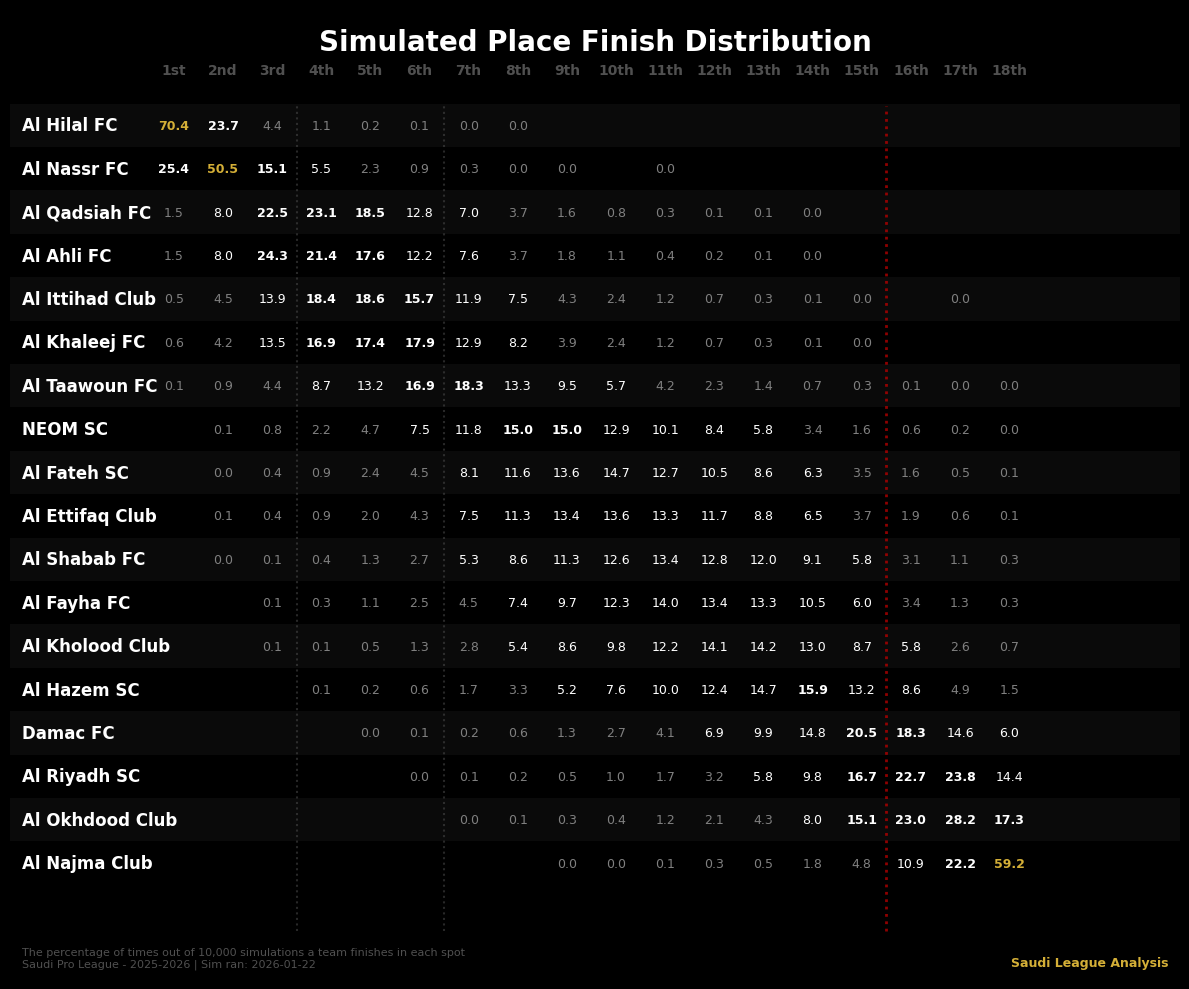

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import glob
import os

# --- 1. SETTINGS & CONFIGURATION ---
NUM_SIMULATIONS = 10000
SEASON_GAMES = 34
K_FACTOR = 4
BG_COLOR, GOLD, WHITE = '#000000', '#D4AF37', '#FFFFFF'
LIGHT_GRAY = '#505050'
VERY_LIGHT_GRAY = '#808080'

def simulate_match(t1_xg, t2_xg):
    """Simulates match outcomes 10k times based on shot-level xG."""
    t1_xg = np.array(t1_xg) if len(t1_xg) > 0 else np.array([0.0])
    t2_xg = np.array(t2_xg) if len(t2_xg) > 0 else np.array([0.0])
    t1_sim = np.random.binomial(1, t1_xg, size=(NUM_SIMULATIONS, len(t1_xg))).sum(axis=1)
    t2_sim = np.random.binomial(1, t2_xg, size=(NUM_SIMULATIONS, len(t2_xg))).sum(axis=1)
    t1_pts = np.where(t1_sim > t2_sim, 3, np.where(t1_sim == t2_sim, 1, 0))
    t2_pts = np.where(t2_sim > t1_sim, 3, np.where(t2_sim == t1_sim, 1, 0))
    t1_gd = t1_sim - t2_sim
    t2_gd = t2_sim - t1_sim
    return t1_pts, t2_pts, t1_gd, t2_gd

def run_comprehensive_analysis():
    # Use current directory or specific path
    csv_files = sorted(glob.glob('/Users/user/XG/Saudi/xgCSV/*.csv'))
    csv_files = [f for f in csv_files if 'summary' not in f.lower() and 'projection' not in f.lower()]
    
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the directory. Check your path.")
    
    elo_ratings = {}
    team_stats = {}
    team_match_sims = {}
    
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            t_col = 'TeamId' if 'TeamId' in df.columns else 'team'
            xg_col = 'xG' if 'xG' in df.columns else 'xg'
            g_col = 'Goal' if 'Goal' in df.columns else 'goal'
            teams = df[t_col].unique()
            if len(teams) < 2:
                continue
            t1, t2 = teams[0], teams[1]
            
            for t in [t1, t2]:
                if t not in elo_ratings:
                    elo_ratings[t] = 100.0
                if t not in team_stats:
                    team_stats[t] = {'gf':[], 'ga':[], 'xgf':[], 'xga':[]}
                if t not in team_match_sims:
                    team_match_sims[t] = []
            
            t1_df, t2_df = df[df[t_col]==t1], df[df[t_col]==t2]
            g1, g2 = t1_df[g_col].sum(), t2_df[g_col].sum()
            x1, x2 = t1_df[xg_col].sum(), t2_df[xg_col].sum()
            
            for team, gf, ga, xf, xa in [(t1, g1, g2, x1, x2), (t2, g2, g1, x2, x1)]:
                team_stats[team]['gf'].append(gf); team_stats[team]['ga'].append(ga)
                team_stats[team]['xgf'].append(xf); team_stats[team]['xga'].append(xa)
            
            # ELO Update
            s1 = 1.0 if g1 > g2 else (0.5 if g1 == g2 else 0.0)
            e1 = 1 / (1 + 10 ** ((elo_ratings[t2] - elo_ratings[t1]) / 400))
            elo_ratings[t1] += K_FACTOR * (s1 - e1)
            elo_ratings[t2] += K_FACTOR * ((1-s1) - (1-e1))
            
            # Match Sims
            p1, p2, gd1, gd2 = simulate_match(t1_df[xg_col].values, t2_df[xg_col].values)
            team_match_sims[t1].append({'pts': p1, 'gd': gd1})
            team_match_sims[t2].append({'pts': p2, 'gd': gd2})
            
        except Exception as e:
            print(f"Skipping {file} due to error: {e}")
            continue
    
    # VALIDATION: Remove teams with zero matches to avoid concatenation errors
    active_teams = [t for t in team_match_sims if len(team_match_sims[t]) > 0]
    if not active_teams:
        raise ValueError("No valid match data found for any team.")
    
    avg_elo = np.mean([elo_ratings[t] for t in active_teams])
    
    # 10k Season Projections
    season_pts = np.zeros((len(active_teams), NUM_SIMULATIONS))
    for i, team in enumerate(active_teams):
        pts_pool = np.concatenate([m['pts'] for m in team_match_sims[team]])
        season_pts[i, :] = np.random.choice(pts_pool, size=(NUM_SIMULATIONS, SEASON_GAMES)).sum(axis=1)
    
    # Get ranking distribution for each team
    ranks_matrix = ((-season_pts).argsort(axis=0).argsort(axis=0)) + 1
    
    # Calculate finish position probabilities
    final_data = []
    for i, team in enumerate(active_teams):
        team_data = {'Team': team}
        # Calculate probability for each finishing position (1st through 20th)
        for pos in range(1, len(active_teams) + 1):
            team_data[f'Pos_{pos}'] = (np.sum(ranks_matrix[i, :] == pos) / NUM_SIMULATIONS) * 100
        final_data.append(team_data)
    
    df = pd.DataFrame(final_data)
    # Sort by expected finish (weighted average of positions)
    position_cols = [c for c in df.columns if c.startswith('Pos_')]
    df['ExpectedPos'] = sum(df[f'Pos_{i}'] * i for i in range(1, len(active_teams) + 1)) / 100
    df = df.sort_values('ExpectedPos').reset_index(drop=True)
    
    return df, len(active_teams)

# --- 3. EXECUTION & VISUALIZATION ---
try:
    df, num_teams = run_comprehensive_analysis()
    
    # Create figure
    fig = plt.figure(figsize=(12, 10), facecolor=BG_COLOR)
    ax = fig.add_subplot(111, facecolor=BG_COLOR)
    ax.axis('off')
    
    # Calculate column positions dynamically based on number of teams
    team_col_width = 0.12
    first_position_col = 0.14
    position_col_width = 0.042
    
    # Title
    title_y = 0.98
    ax.text(0.5, title_y, 'Simulated Place Finish Distribution', 
            ha='center', va='top', fontsize=20, fontweight='bold', color=WHITE,
            transform=ax.transAxes)
    
    # Header row - Position numbers
    header_y = 0.93
    for pos in range(1, num_teams + 1):
        x_pos = first_position_col + (pos - 1) * position_col_width
        # Determine suffix
        if pos == 1:
            suffix = 'st'
        elif pos == 2:
            suffix = 'nd'
        elif pos == 3:
            suffix = 'rd'
        else:
            suffix = 'th'
        
        ax.text(x_pos, header_y, f'{pos}{suffix}',
                ha='center', va='bottom', fontsize=10, fontweight='bold', color=LIGHT_GRAY,
                transform=ax.transAxes)
    
    # Draw vertical separator lines
    separator_positions = [3, 6]  # After 3rd and 6th place
    for sep_pos in separator_positions:
        if sep_pos < num_teams:
            x_line = first_position_col + (sep_pos) * position_col_width - position_col_width/2
            ax.plot([x_line, x_line], [0.05, 0.90], 
                   color=LIGHT_GRAY, linestyle=':', linewidth=1.5, 
                   transform=ax.transAxes, alpha=0.5)
    
    # Relegation zone line (last 3 positions)
    if num_teams >= 16:
        x_rel_line = first_position_col + (num_teams - 3) * position_col_width - position_col_width/2
        ax.plot([x_rel_line, x_rel_line], [0.05, 0.90], 
               color='#CC0000', linestyle=':', linewidth=2, 
               transform=ax.transAxes, alpha=0.7)
    
    # Data rows
    row_height = 0.85 / (len(df) + 1)
    start_y = 0.88
    
    for idx, row in df.iterrows():
        y_pos = start_y - (idx * row_height)
        
        # Alternating row background
        if idx % 2 == 0:
            rect = Rectangle((0, y_pos - row_height/2), 1, row_height,
                           facecolor='#0a0a0a', edgecolor='none',
                           transform=ax.transAxes, zorder=0)
            ax.add_patch(rect)
        
        # Team name
        ax.text(0.01, y_pos, row['Team'],
                ha='left', va='center', fontsize=12, fontweight='bold', color=WHITE,
                transform=ax.transAxes)
        
        # Position probabilities
        for pos in range(1, num_teams + 1):
            x_pos = first_position_col + (pos - 1) * position_col_width
            prob = row[f'Pos_{pos}']
            
            # Format display
            if prob >= 1.0:
                display_val = f"{prob:.1f}"
            elif prob > 0.05:
                display_val = f"{prob:.1f}"
            elif prob > 0:
                display_val = f"{prob:.1f}"
            else:
                display_val = ""
            
            # Color coding based on probability
            if prob >= 30:
                color = GOLD
                fontweight = 'bold'
            elif prob >= 15:
                color = WHITE
                fontweight = 'bold'
            elif prob >= 5:
                color = WHITE
                fontweight = 'normal'
            elif prob > 0:
                color = VERY_LIGHT_GRAY
                fontweight = 'normal'
            else:
                color = VERY_LIGHT_GRAY
                fontweight = 'normal'
                
            if display_val:
                ax.text(x_pos, y_pos, display_val,
                        ha='center', va='center', fontsize=9, color=color, fontweight=fontweight,
                        transform=ax.transAxes)
    
    # Footer
    footer_text = (f"The percentage of times out of {NUM_SIMULATIONS:,} simulations a team finishes in each spot\n"
                   f"Saudi Pro League - 2025-2026 | Sim ran: {pd.Timestamp.now().strftime('%Y-%m-%d')}")
    ax.text(0.01, 0.01, footer_text,
            ha='left', va='bottom', fontsize=8, color=LIGHT_GRAY,
            transform=ax.transAxes)
    
    # Branding
    ax.text(0.99, 0.01, 'Saudi League Analysis',
            ha='right', va='bottom', fontsize=9, fontweight='bold', color=GOLD,
            transform=ax.transAxes)
    
    plt.tight_layout()
    plt.savefig('saudi_league_finish_distribution.png', dpi=300, bbox_inches='tight', facecolor=BG_COLOR)
    print("✓ Finish Distribution visualization saved successfully!")
    plt.show()
    
except Exception as e:
    print(f"CRITICAL ERROR: {e}")
    import traceback
    traceback.print_exc()